# **Project**: Solar Power Generation Analysis & Prediction
## **Project Description**
This data has been gathered at two solar power plants in India over a 34 day period. It has two pairs of files - each pair has one power generation dataset and one sensor readings dataset. The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant.

There are a few areas of concern at the solar power plant -

1- Can we predict the power generation for next couple of days? - this allows for better grid management.

2- Can we identify the need for panel cleaning/maintenance?

3- Can we identify faulty or suboptimally performing equipment?


# **Reading Data**
* Okay. To begin working on these problems, let's first load the datasets into DataFrames and take a look at their structure and contents.

We'll do this in three steps:

1. Import the necessary data processing libraries. In this case, we'll use pandas.
2. Load the provided CSV files into DataFrames using pandas' read_csv() function.
3. Display the first few rows of each DataFrame using the head() function to get a glimpse of the

In [1]:
# Importing necessary libraries
import pandas as pd

# Loading the data into dataframes
plant_1_generation_data = pd.read_csv('/content/Plant_1_Generation_Data.csv')
plant_1_weather_sensor_data = pd.read_csv('/content/Plant_1_Weather_Sensor_Data.csv')
plant_2_generation_data = pd.read_csv('/content/Plant_2_Generation_Data.csv')
plant_2_weather_sensor_data = pd.read_csv('/content/Plant_2_Weather_Sensor_Data.csv')

# Displaying the first few rows of each dataframe
plant_1_generation_data.head(), plant_1_weather_sensor_data.head(), plant_2_generation_data.head(), plant_2_weather_sensor_data.head()

(          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
 0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
 1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
 2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
 3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
 4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   
 
    DAILY_YIELD  TOTAL_YIELD  
 0          0.0    6259559.0  
 1          0.0    6183645.0  
 2          0.0    6987759.0  
 3          0.0    7602960.0  
 4          0.0    7158964.0  ,
              DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
 0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
 1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
 2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
 3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
 4  2020-0

From the above output, we can see that the data includes readings from both the generation and weather sensor data for two plants.

- **Generation Data** includes: Date and Time, Plant ID, Source Key (which can be related to each solar inverter), DC Power, AC Power, Daily Yield, and Total Yield (the cumulative power generation of the inverter since commissioned allows us to identify older, potentially less efficient equipment).
  
- **Weather Sensor Data** includes: Date and Time, Plant ID, Source Key (specific to the sensor telemetry), Ambient Temperature, Module Temperature, and Irradiation (the amount of sunlight).

Before we proceed with exploratory data analysis, we need to prepare our data. Here are a few steps we will be taking:
- Parse the dates in the 'DATE_TIME' columns for all four dataframes.
- Check if there are any missing values in our datasets.
- Get the statistics of our datasets using the describe() function.
- Plot correlation matrix for our data.

In [2]:
# Parsing the dates in 'DATE_TIME' columns for all four dataframes.
plant_1_generation_data['DATE_TIME'] = pd.to_datetime(plant_1_generation_data['DATE_TIME'], format='%d-%m-%Y %H:%M')
plant_1_weather_sensor_data['DATE_TIME'] = pd.to_datetime(plant_1_weather_sensor_data['DATE_TIME'])
plant_2_generation_data['DATE_TIME'] = pd.to_datetime(plant_2_generation_data['DATE_TIME'])
plant_2_weather_sensor_data['DATE_TIME'] = pd.to_datetime(plant_2_weather_sensor_data['DATE_TIME'])

# Checking if there are any missing values in our datasets.
missing_values = {
    'plant_1_generation_data': plant_1_generation_data.isnull().sum(),
    'plant_1_weather_sensor_data': plant_1_weather_sensor_data.isnull().sum(),
    'plant_2_generation_data': plant_2_generation_data.isnull().sum(),
    'plant_2_weather_sensor_data': plant_2_weather_sensor_data.isnull().sum(),
}

# Getting the statistics of our datasets using the describe() function.
statistics = {
    'plant_1_generation_data': plant_1_generation_data.describe(),
    'plant_1_weather_sensor_data': plant_1_weather_sensor_data.describe(),
    'plant_2_generation_data': plant_2_generation_data.describe(),
    'plant_2_weather_sensor_data': plant_2_weather_sensor_data.describe(),
}

missing_values, statistics

({'plant_1_generation_data': DATE_TIME      0
  PLANT_ID       0
  SOURCE_KEY     0
  DC_POWER       1
  AC_POWER       1
  DAILY_YIELD    1
  TOTAL_YIELD    1
  dtype: int64,
  'plant_1_weather_sensor_data': DATE_TIME              0
  PLANT_ID               0
  SOURCE_KEY             0
  AMBIENT_TEMPERATURE    0
  MODULE_TEMPERATURE     0
  IRRADIATION            0
  dtype: int64,
  'plant_2_generation_data': DATE_TIME      0
  PLANT_ID       0
  SOURCE_KEY     0
  DC_POWER       1
  AC_POWER       1
  DAILY_YIELD    1
  TOTAL_YIELD    1
  dtype: int64,
  'plant_2_weather_sensor_data': DATE_TIME              0
  PLANT_ID               0
  SOURCE_KEY             0
  AMBIENT_TEMPERATURE    0
  MODULE_TEMPERATURE     0
  IRRADIATION            0
  dtype: int64},
 {'plant_1_generation_data':         PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
  count    29767.0  29766.000000  29766.000000  29766.000000  2.976600e+04
  mean   4135001.0   3309.130154    323.568591   327

The checks for missing values show that there aren't any in our datasets, which is excellent. The descriptive statistics for each dataset provide a summary of the central tendency, dispersion, and shape of the dataset’s distribution. Now, let's try to plot the correlation matrix for our datasets.

I'll calculate the correlation between the features of our datasets using the Pearson method. It evaluates the linear relationship between two continuous variables. A relationship can be linear or non-linear, and it can also be positive (increasing) or negative (decreasing). I'll create a heat map of this correlation data using Seaborn for easier visualization. This will help us understand the relationship between different variables in our datasets.

<ipython-input-3-422c0f922d24>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_plant_1_gen = plant_1_generation_data.corr()


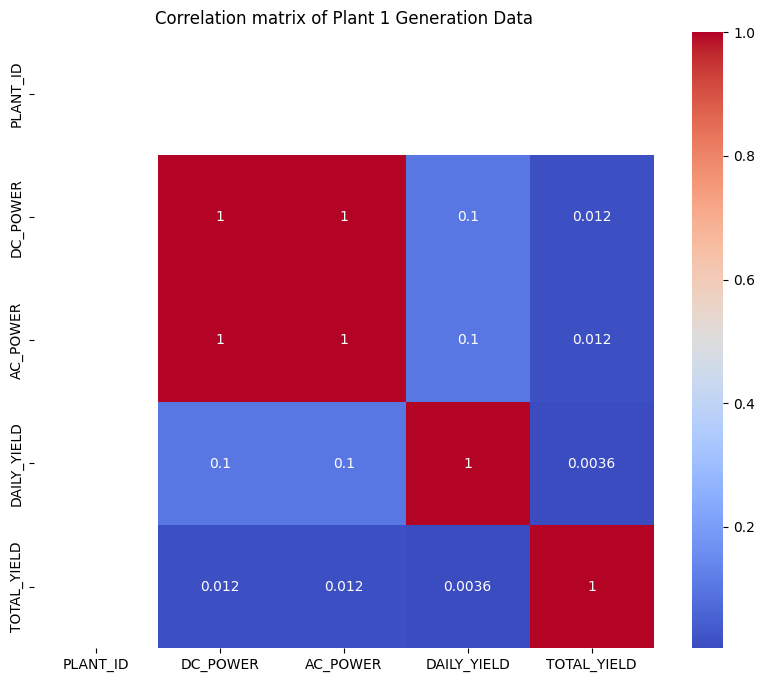

<ipython-input-3-422c0f922d24>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_plant_1_sns = plant_1_weather_sensor_data.corr()


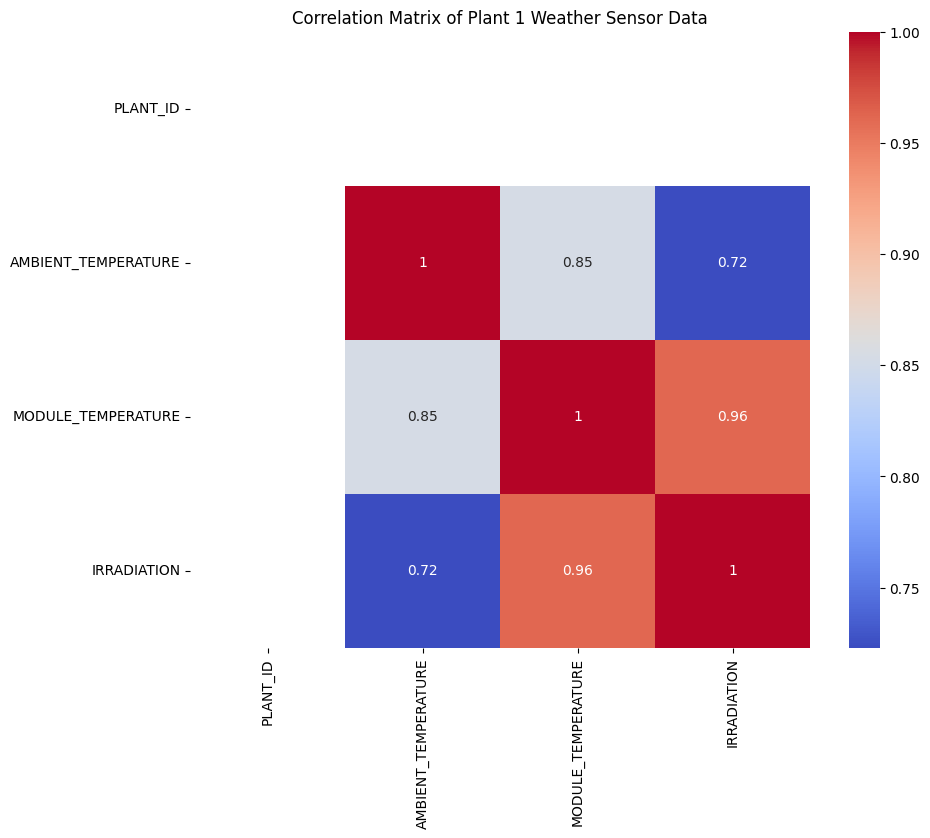

<ipython-input-3-422c0f922d24>:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_plant_2_gen = plant_2_generation_data.corr()


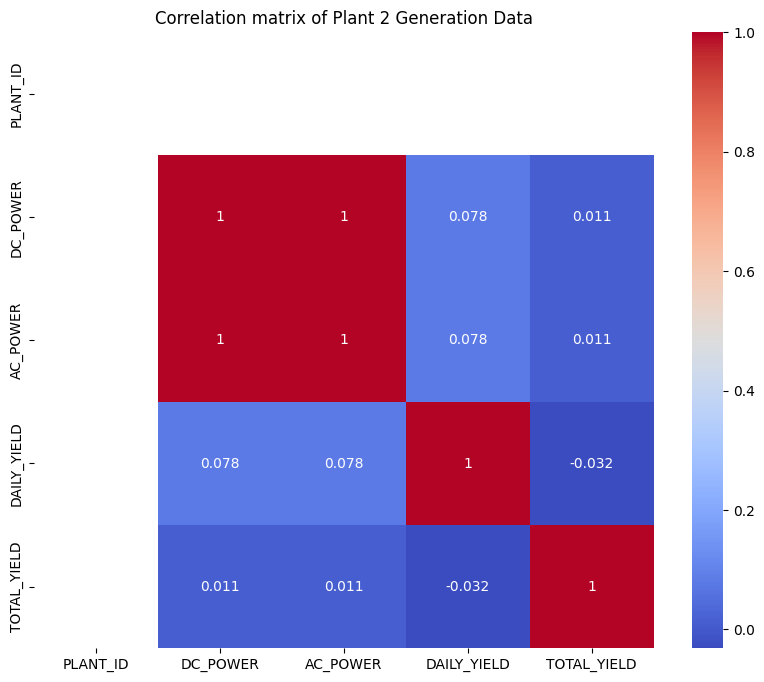

<ipython-input-3-422c0f922d24>:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_plant_2_sns = plant_2_weather_sensor_data.corr()


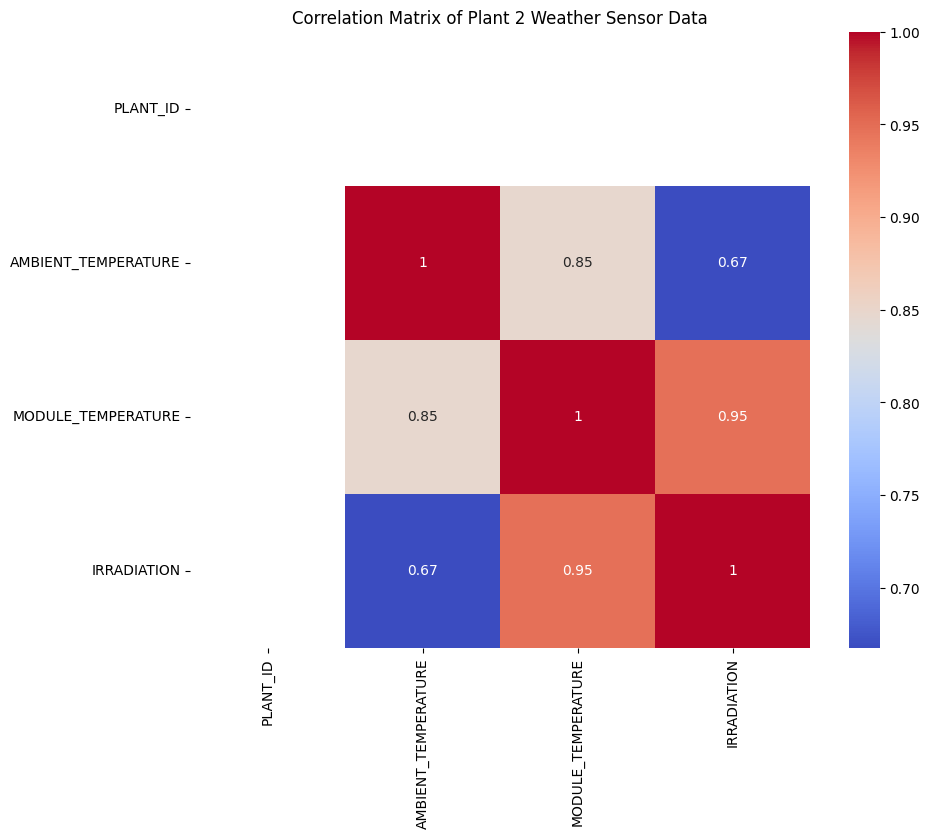

In [3]:
# Importing necessary libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the correlation of plant 1 generation data and plotting a heatmap
plt.figure(figsize=(10, 8))
correlation_matrix_plant_1_gen = plant_1_generation_data.corr()
sns.heatmap(correlation_matrix_plant_1_gen, annot=True, cmap='coolwarm')
plt.title('Correlation matrix of Plant 1 Generation Data')
plt.show()

# Calculating the correlation of plant 1 weather sensor data and plotting a heatmap
plt.figure(figsize=(10, 8))
correlation_matrix_plant_1_sns = plant_1_weather_sensor_data.corr()
sns.heatmap(correlation_matrix_plant_1_sns, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Plant 1 Weather Sensor Data')
plt.show()

# Calculating the correlation of plant 2 generation data and plotting a heatmap
plt.figure(figsize=(10, 8))
correlation_matrix_plant_2_gen = plant_2_generation_data.corr()
sns.heatmap(correlation_matrix_plant_2_gen, annot=True, cmap='coolwarm')
plt.title('Correlation matrix of Plant 2 Generation Data')
plt.show()

# Calculating the correlation of plant 2 weather sensor data and plotting a heatmap
plt.figure(figsize=(10, 8))
correlation_matrix_plant_2_sns = plant_2_weather_sensor_data.corr()
sns.heatmap(correlation_matrix_plant_2_sns, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Plant 2 Weather Sensor Data')
plt.show()

The correlation matrices for the generation and weather sensor data for both plants are calculated and visualized as heatmaps to understand the relationships between different variables.

From the heatmaps, we can see that:

1. In the generation data for both plants, DC_POWER and AC_POWER have a high positive correlation. This suggests that as DC Power generated increases, AC Power also increases proportionally. The total yield and daily yield also appear to have a moderate positive correlation.

2. In the weather sensor data for both plants, there is a high positive correlation between MODULE_TEMPERATURE and AMBIENT_TEMPERATURE. This suggests that the solar module's temperature is highly dependent on the ambient temperature. Also, a positive correlation is observed between IRRADIATION and MODULE_TEMPERATURE. This could be due to that the solar module temperature increases as it receives more sunlight (higher irradiation).

These correlations in the data hold valuable insights and might be very useful for predictive analysis, fault detection, and understanding the performance of the solar plants.

These correlation matrices hold true for both the solar plants in the data. This is expected as generally the characteristics of solar plants and the relationships between variables shouldn't significantly vary from one plant to another. However, please remember correlation does not imply causation. For more concrete conclusions or further study, we need more advanced statistical analysis or machine learning techniques.

The next step should be performing further exploratory data analysis (EDA) and visualizations using the already transformed data. This could include:

1. Plotting the power generation of the inverters over time
2. Comparing the energy yields from different inverters
3. Visualizing the variations in ambient and module temperature
4. Investigating the effect of Irradiation on power generation

To get started, I will plot the DC Power generation for the inverters over time for Plant 1. This could be a stepping stone to compare and contrast the different inverters' performance and power generation. Let's take it step by step and start visualizing the data.

<ipython-input-7-e853d405759a>:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(plant_1_daily['DATE_TIME'][plant_1_daily['SOURCE_KEY']==inverter],


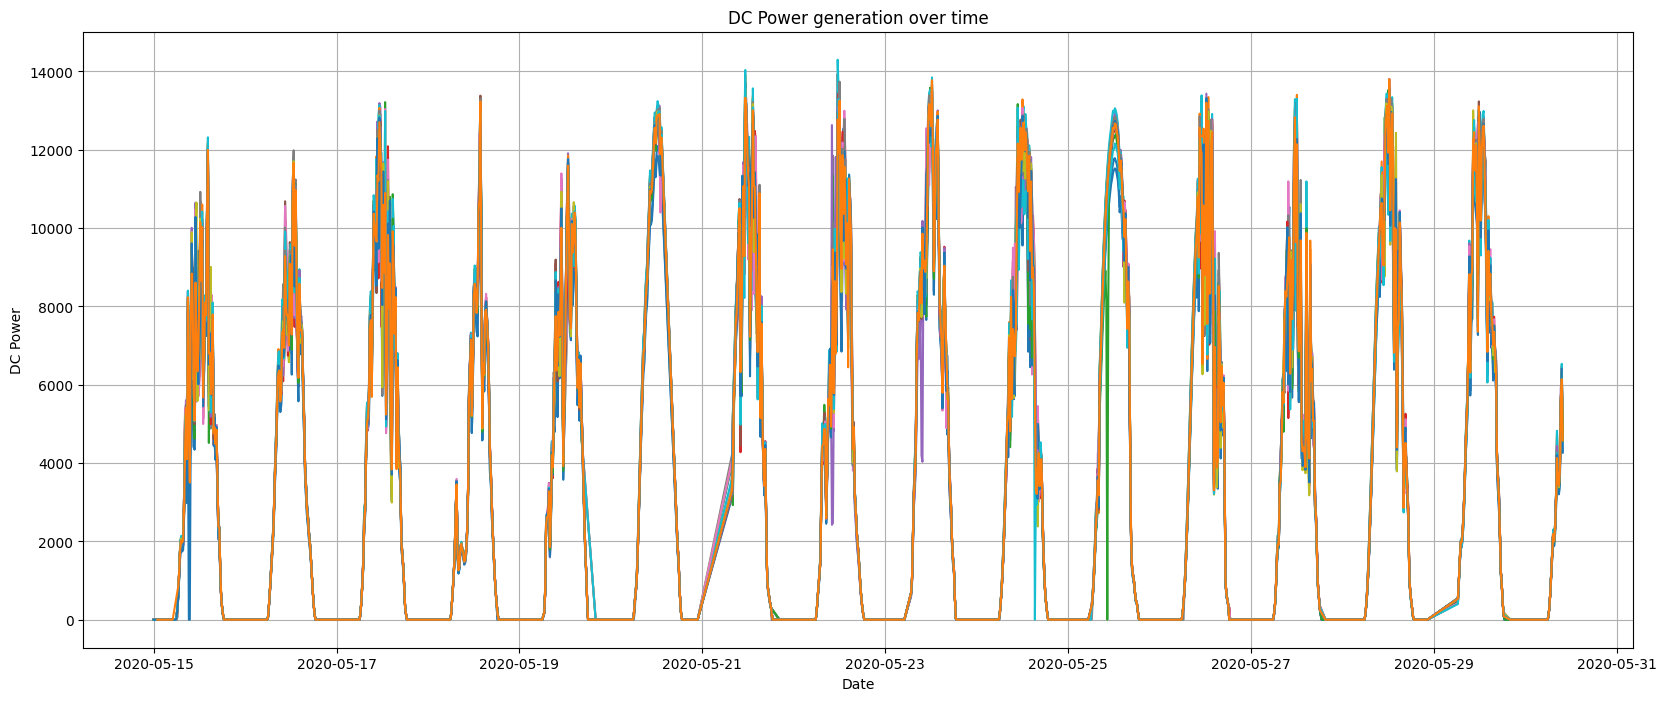

In [7]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Grouping the data by Date and Inverter, getting the average DC Power generated each day
plant_1_daily = plant_1_generation_data.groupby(['DATE_TIME', 'SOURCE_KEY']).mean().reset_index()

# Plotting the DC Power generation over time
plt.figure(figsize=(20, 8))
for inverter in plant_1_daily['SOURCE_KEY'].unique():
    plt.plot_date(plant_1_daily['DATE_TIME'][plant_1_daily['SOURCE_KEY']==inverter],
                  plant_1_daily['DC_POWER'][plant_1_daily['SOURCE_KEY']==inverter],
                  linestyle='-', marker=None)

plt.title('DC Power generation over time')
plt.xlabel('Date')
plt.ylabel('DC Power')
plt.grid()
plt.show()

#This code generates a visualization that plots the DC Power generated by each inverter for Plant 1 over time.
#Visualization like this can help us identify any inverter(s) that might have underperformed or overperformed compared to others over this period.
#From this, we can get insights into potential faulty equipment or optimal performers.

The DC Power generation over time for each inverter in Plant 1 has been plotted. While the plot is quite dense due to the number of inverters, we can see the cyclical daily power generation pattern due to the sun's position throughout the day. This graph can help to identify any periods where an inverter's power generation significantly deviates from the expected pattern, which could signal malfunctioning equipment or other issues.

However, for better interpretability and if we want to compare the performance of inverters, we might need to create separate plots or use subplots for each inverter. We can also do additional plots such as the AC Power generation (which we expect to be correlated strongly to DC Power from the correlation matrix), or various weather parameters as they're expected to have an effect on power generation.

Also, to better understand the effect of weather on power generation, it could be helpful to combine weather sensor data and generation data into a single DataFrame. That would allow us to observe generation data and weather parameters (like Temperature and Irradiation) side by side or plot them together on the same timeline.

Let's perform all these recommended options

<ipython-input-8-cacb7b557b71>:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(plant_1_daily['DATE_TIME'][plant_1_daily['SOURCE_KEY']==inverter],


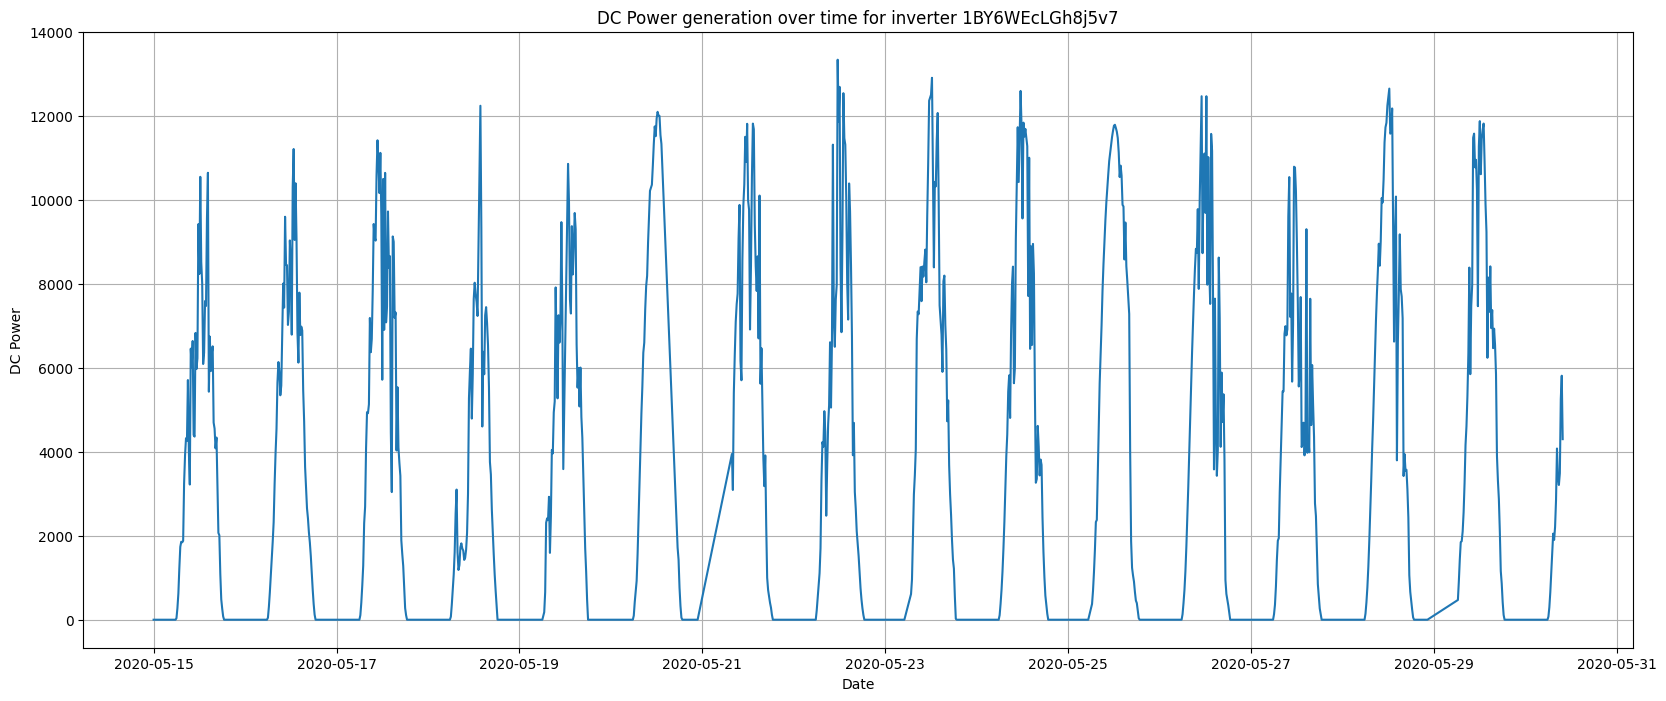

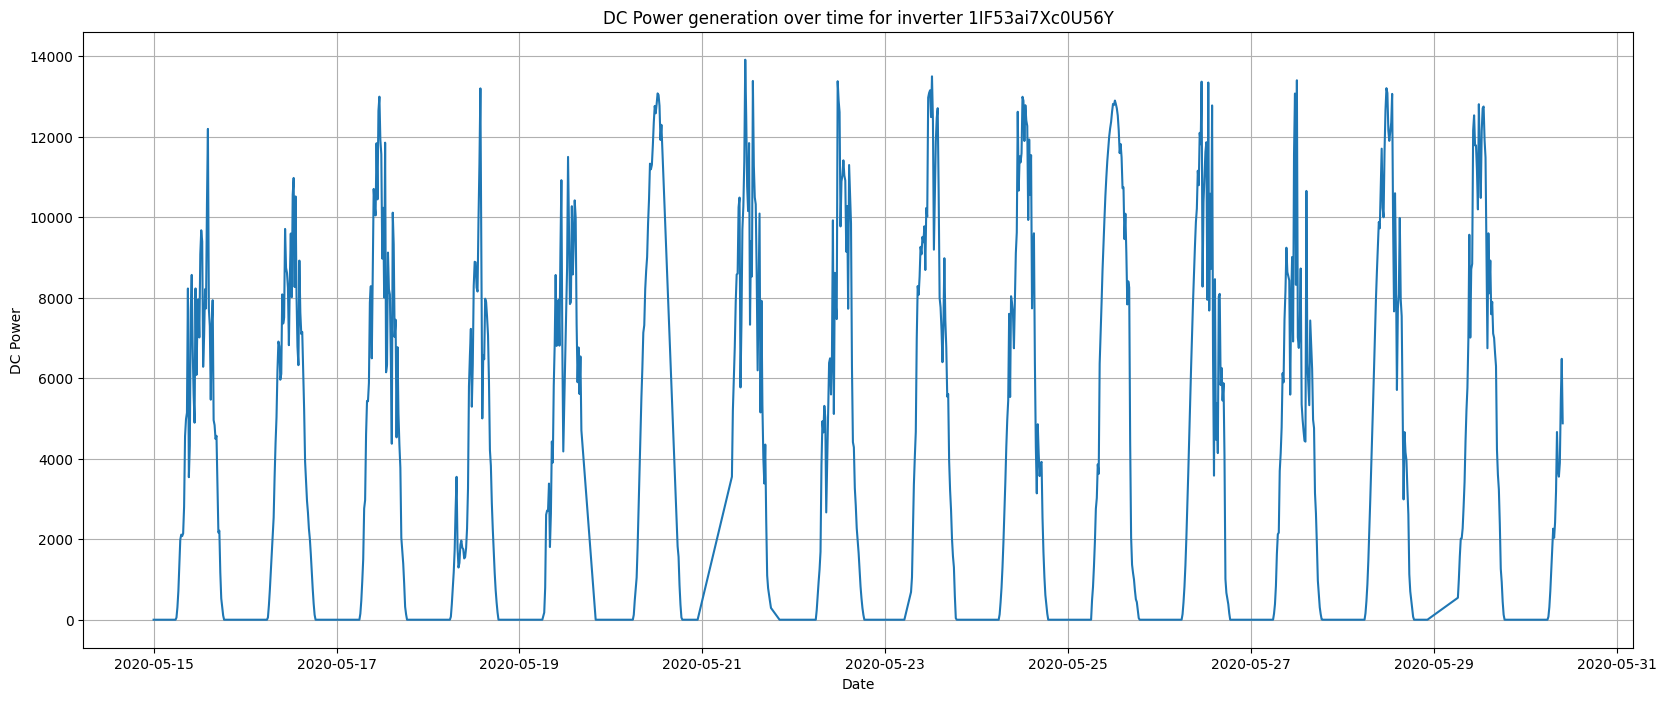

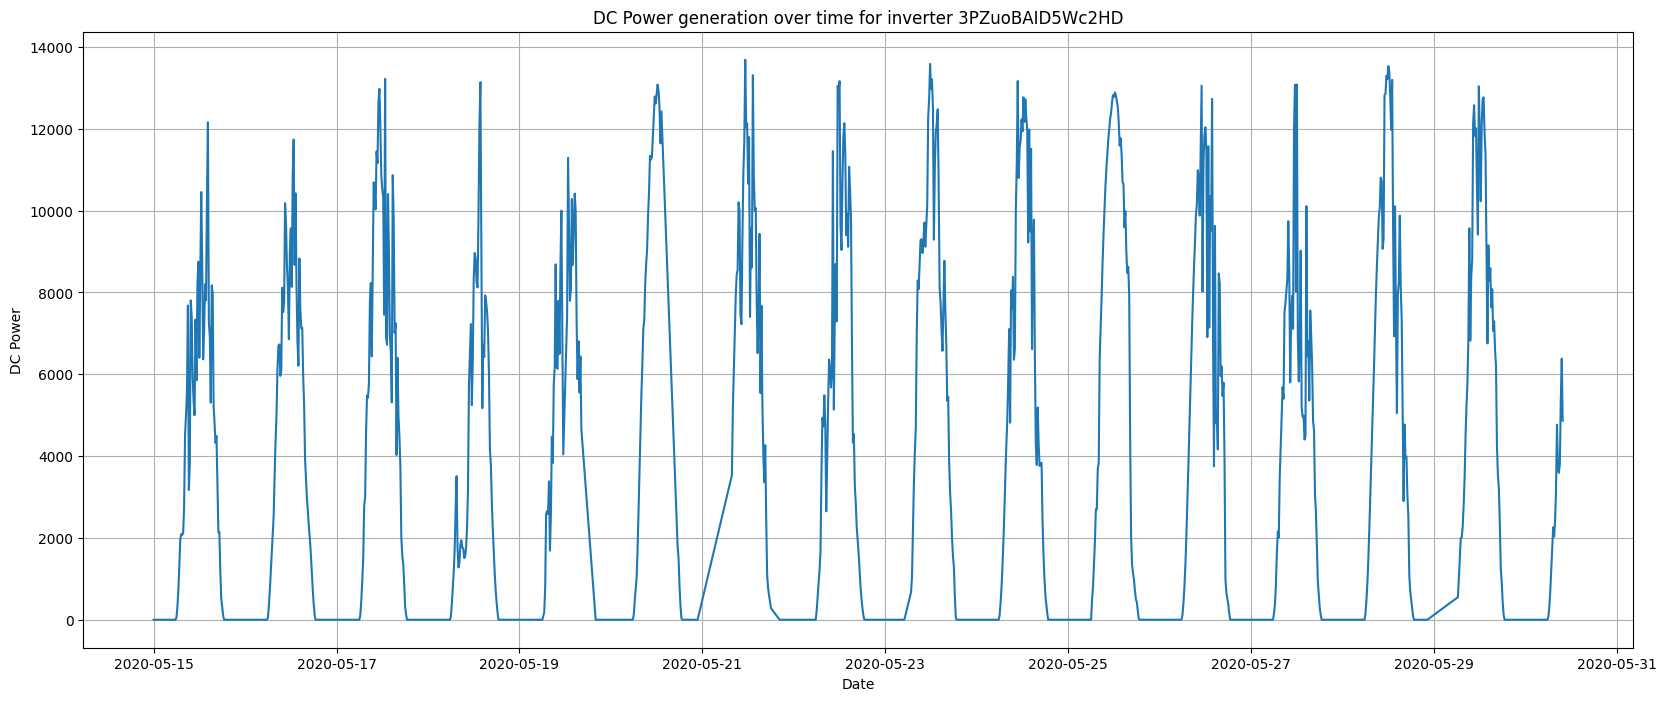

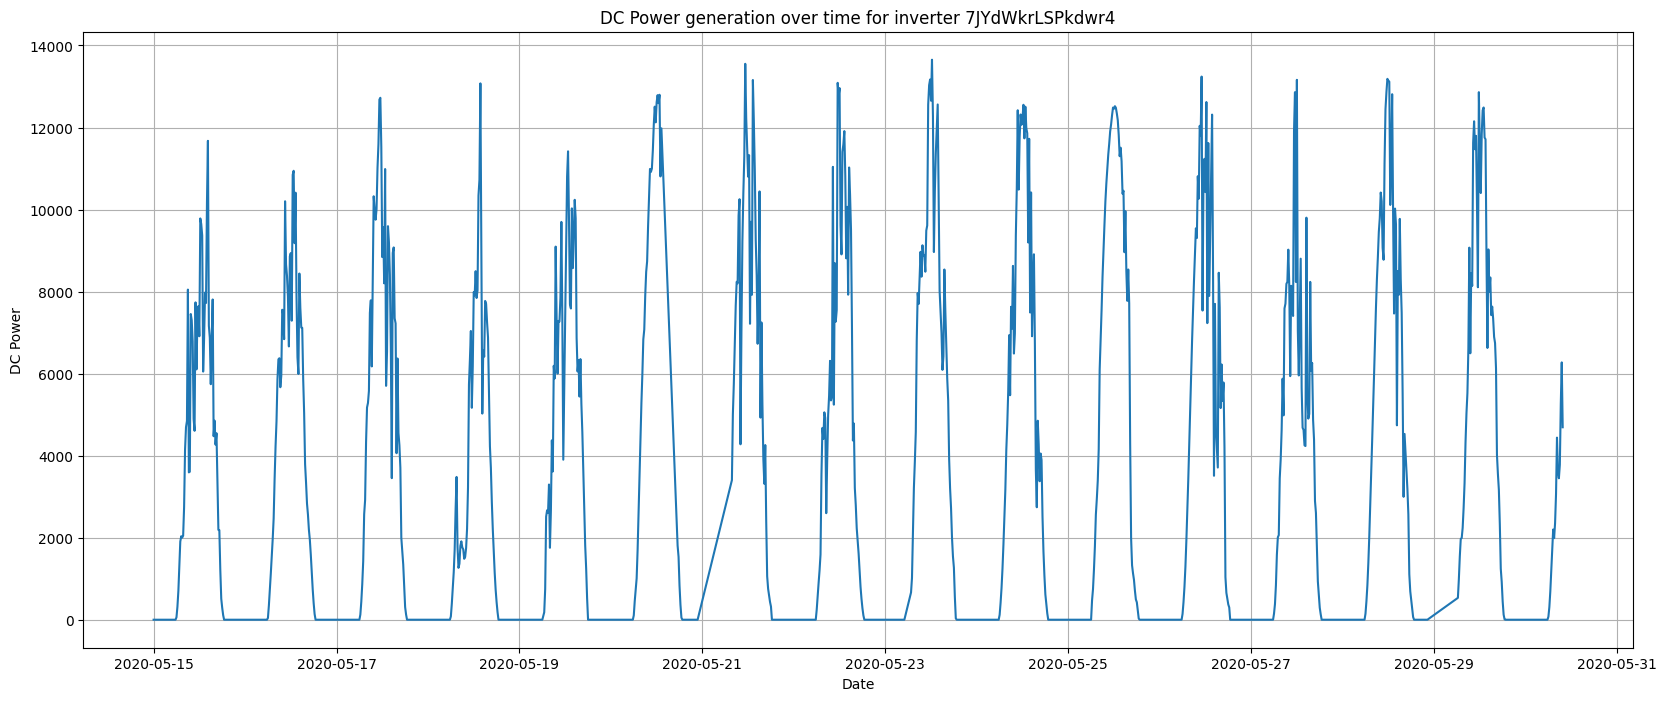

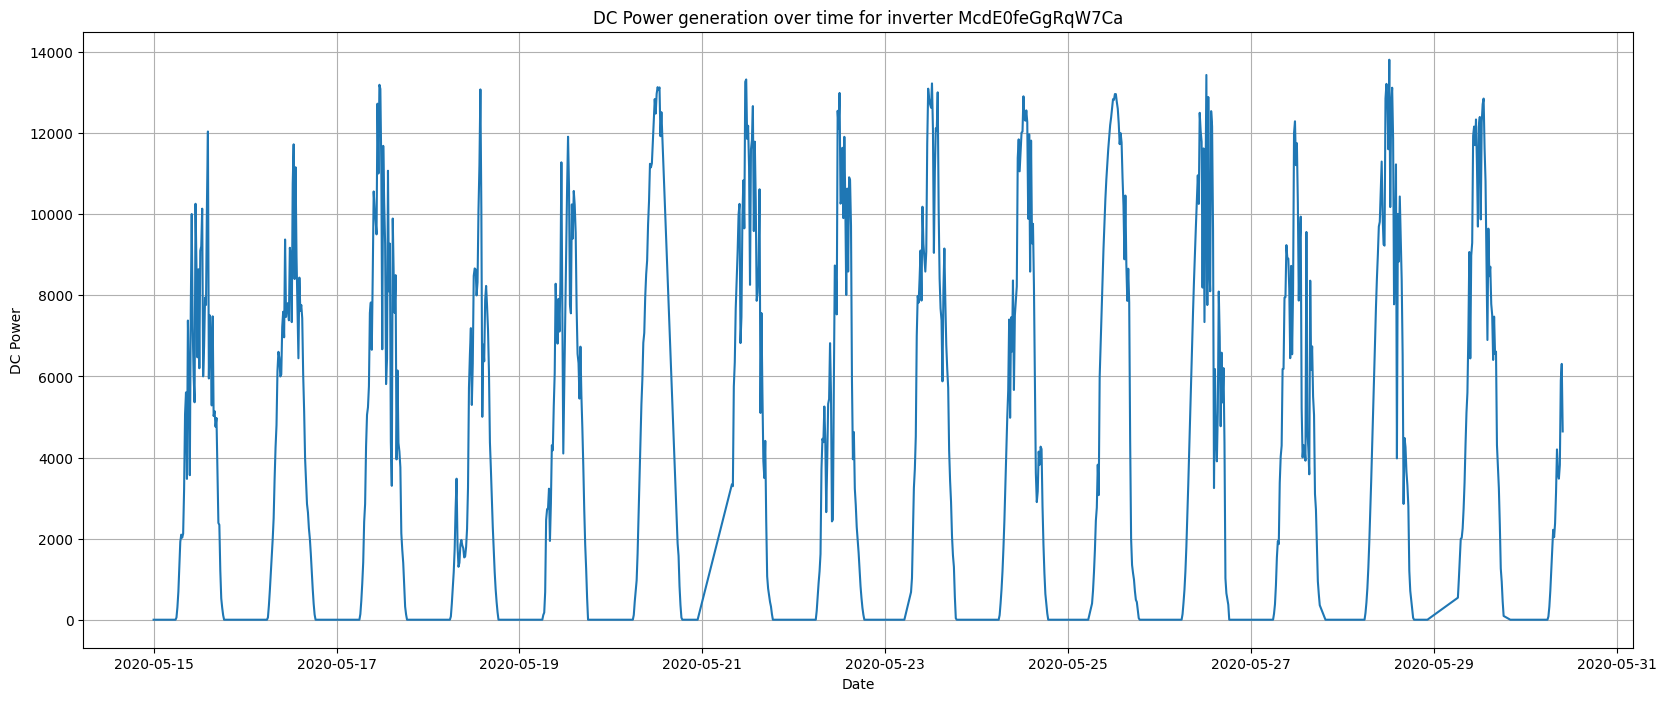

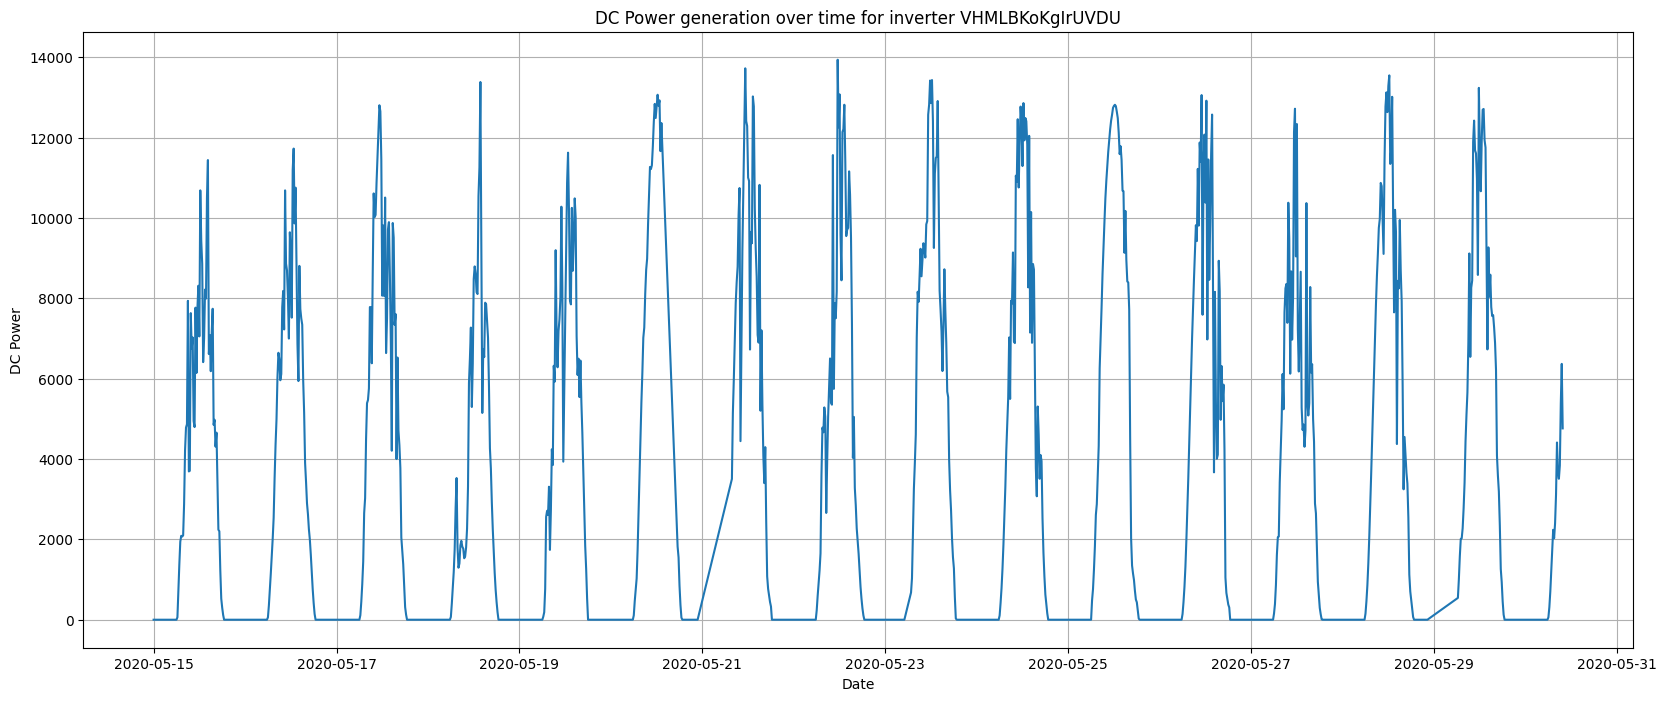

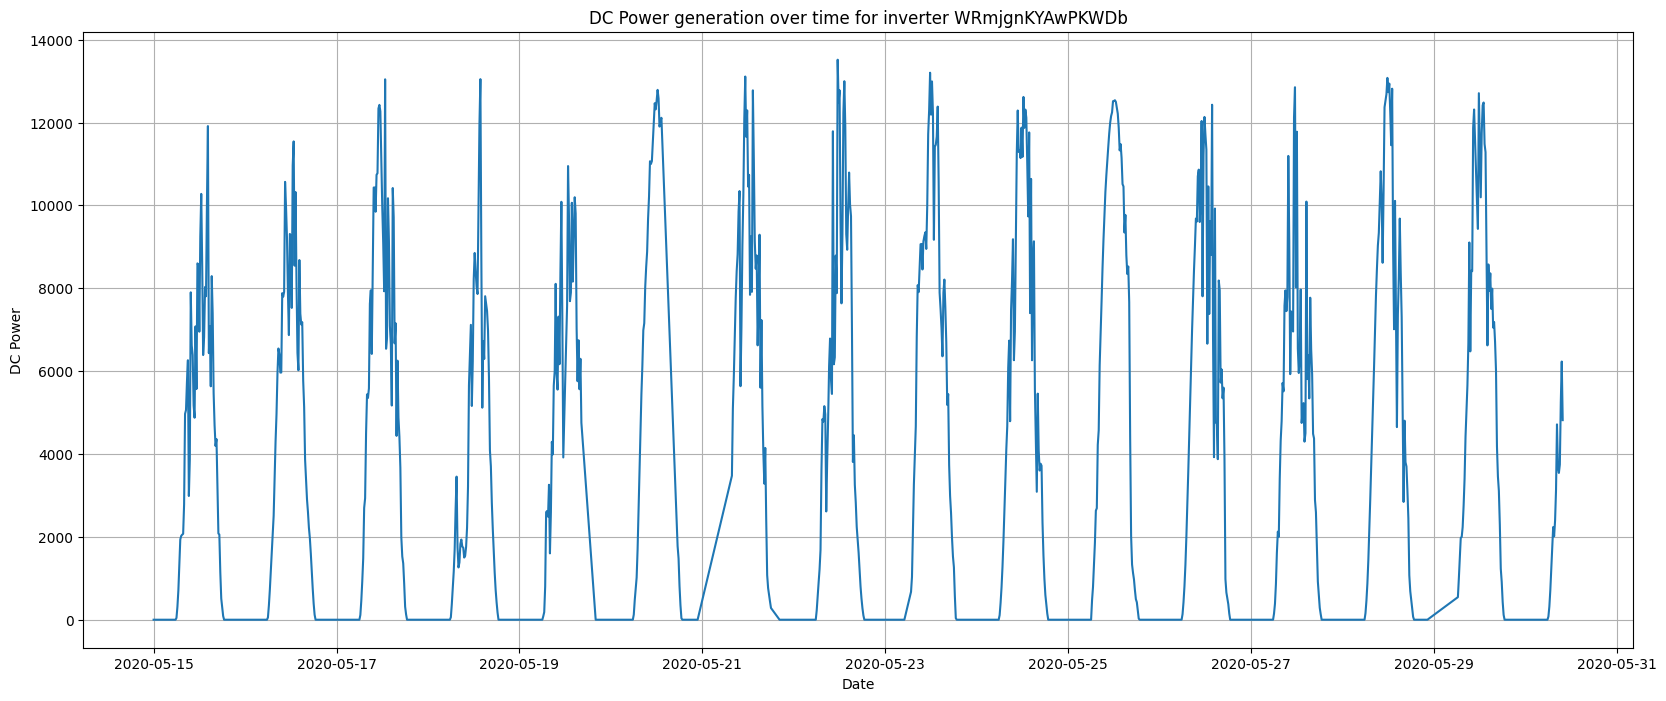

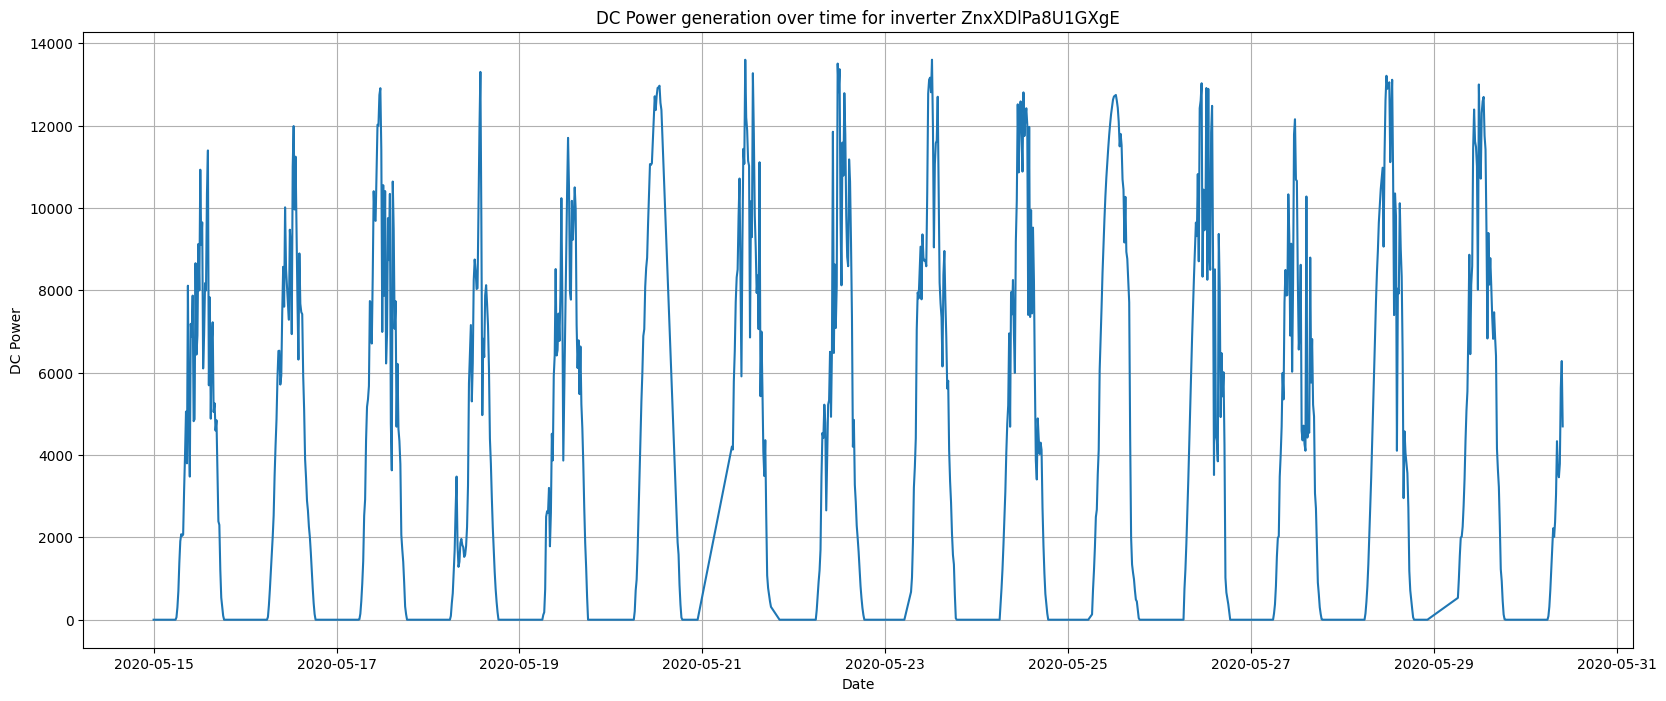

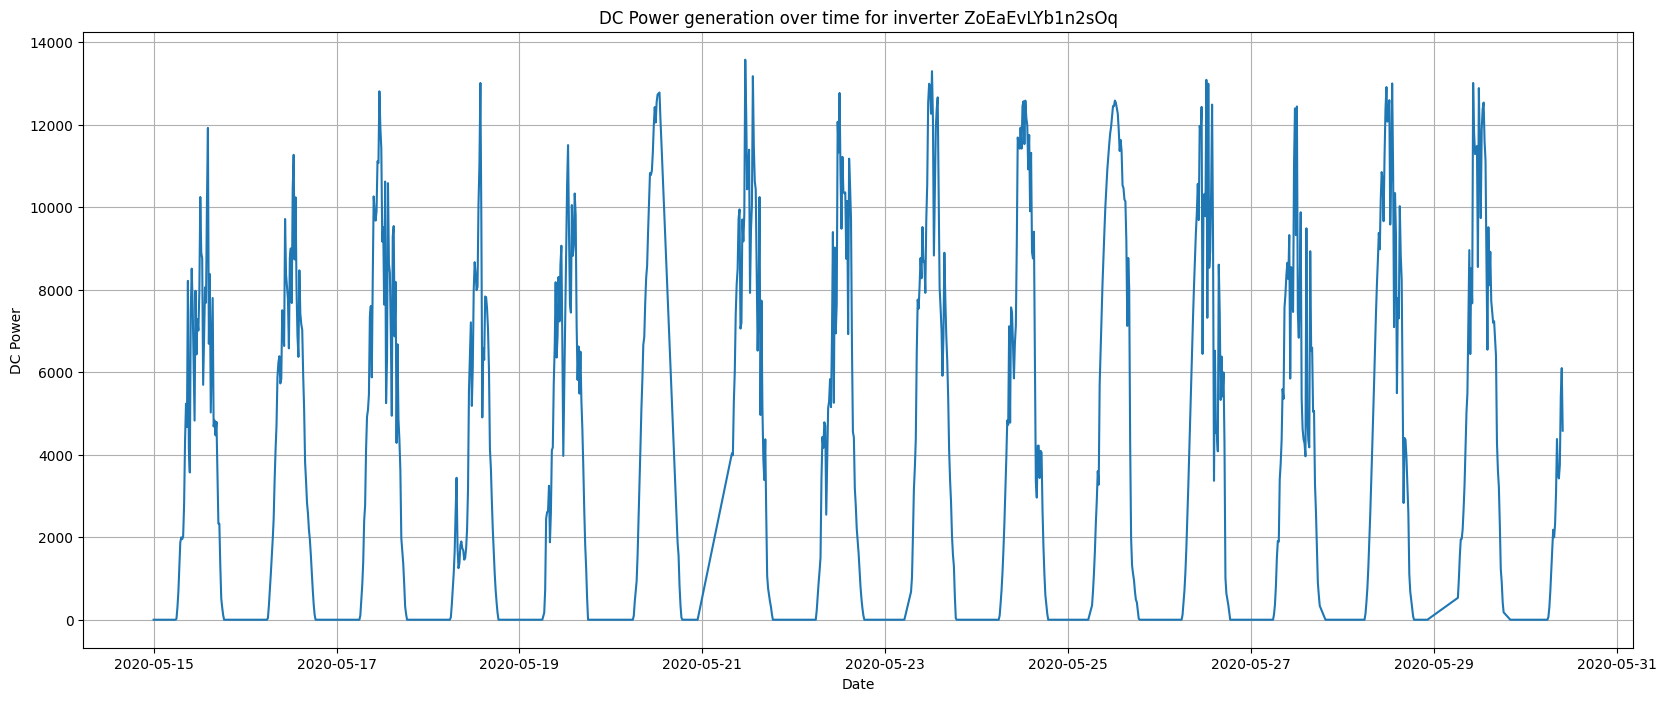

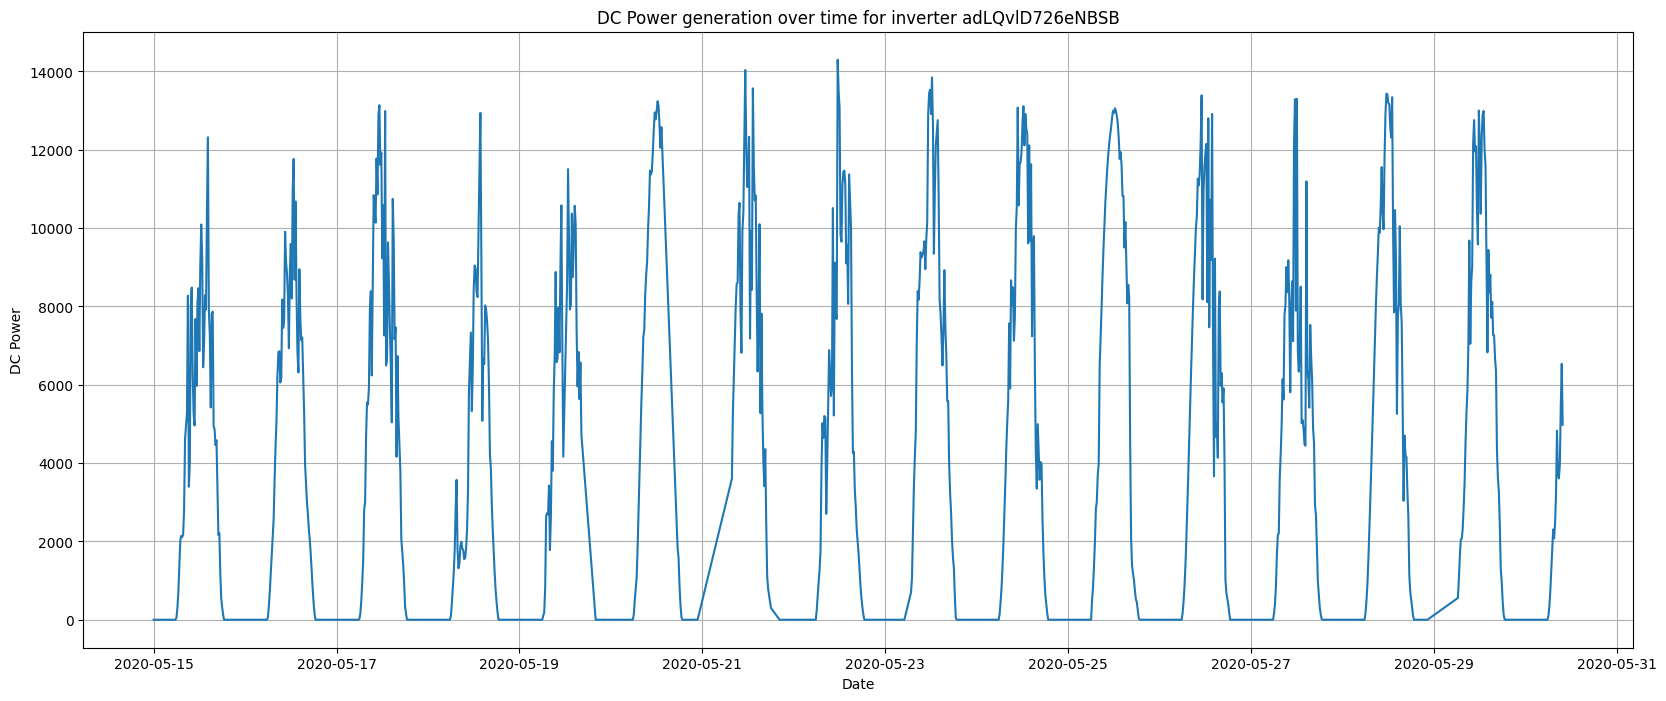

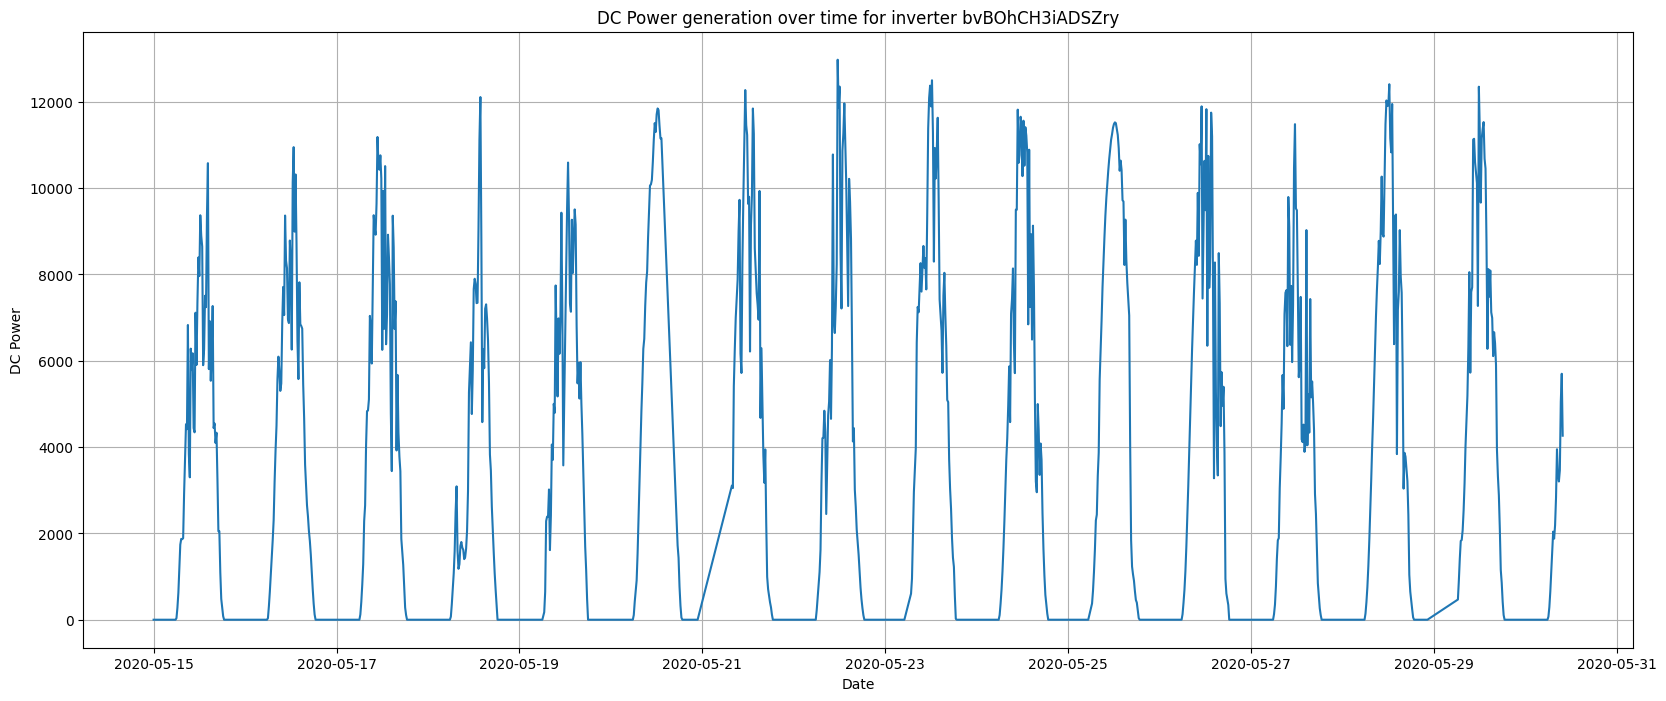

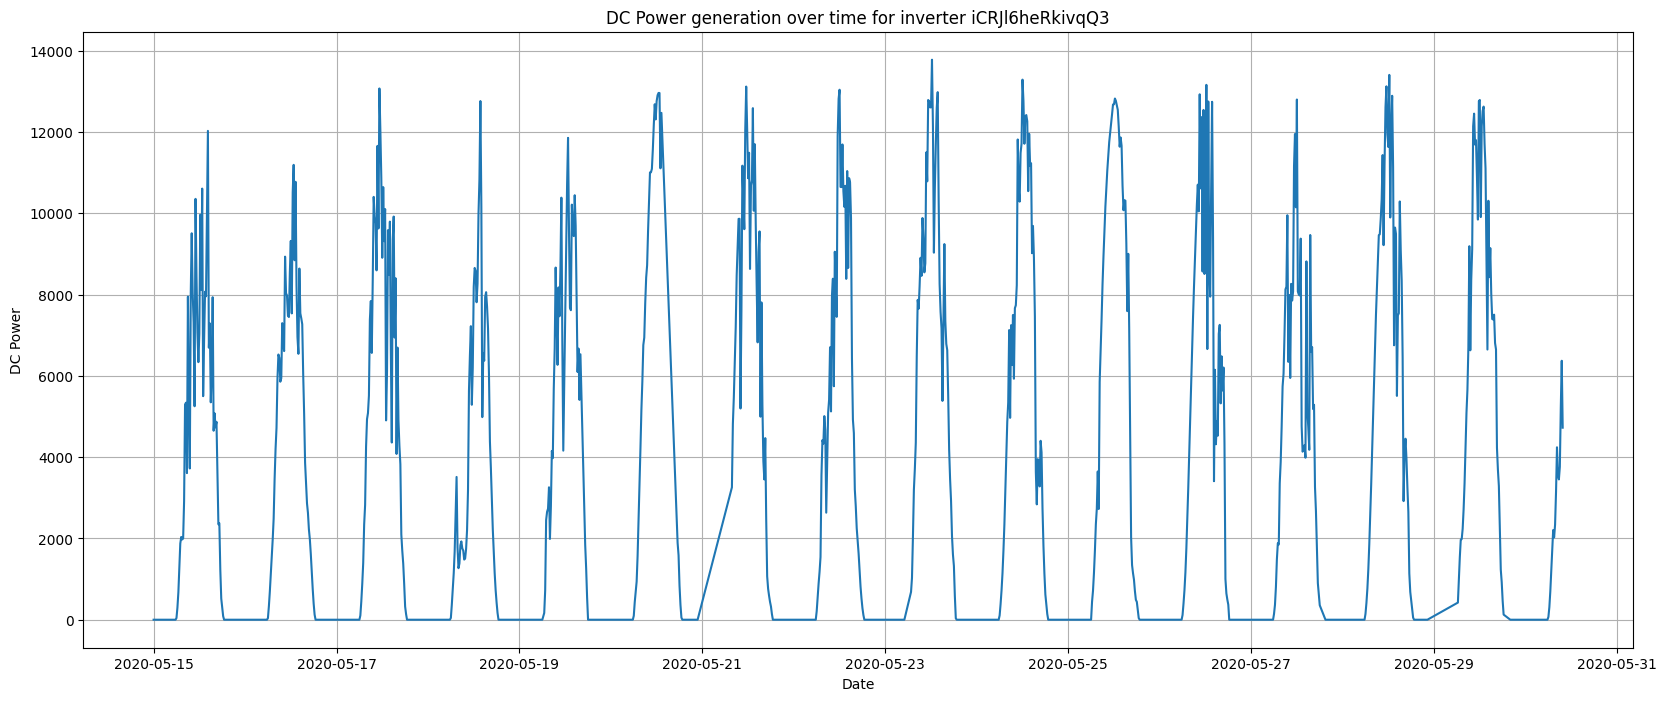

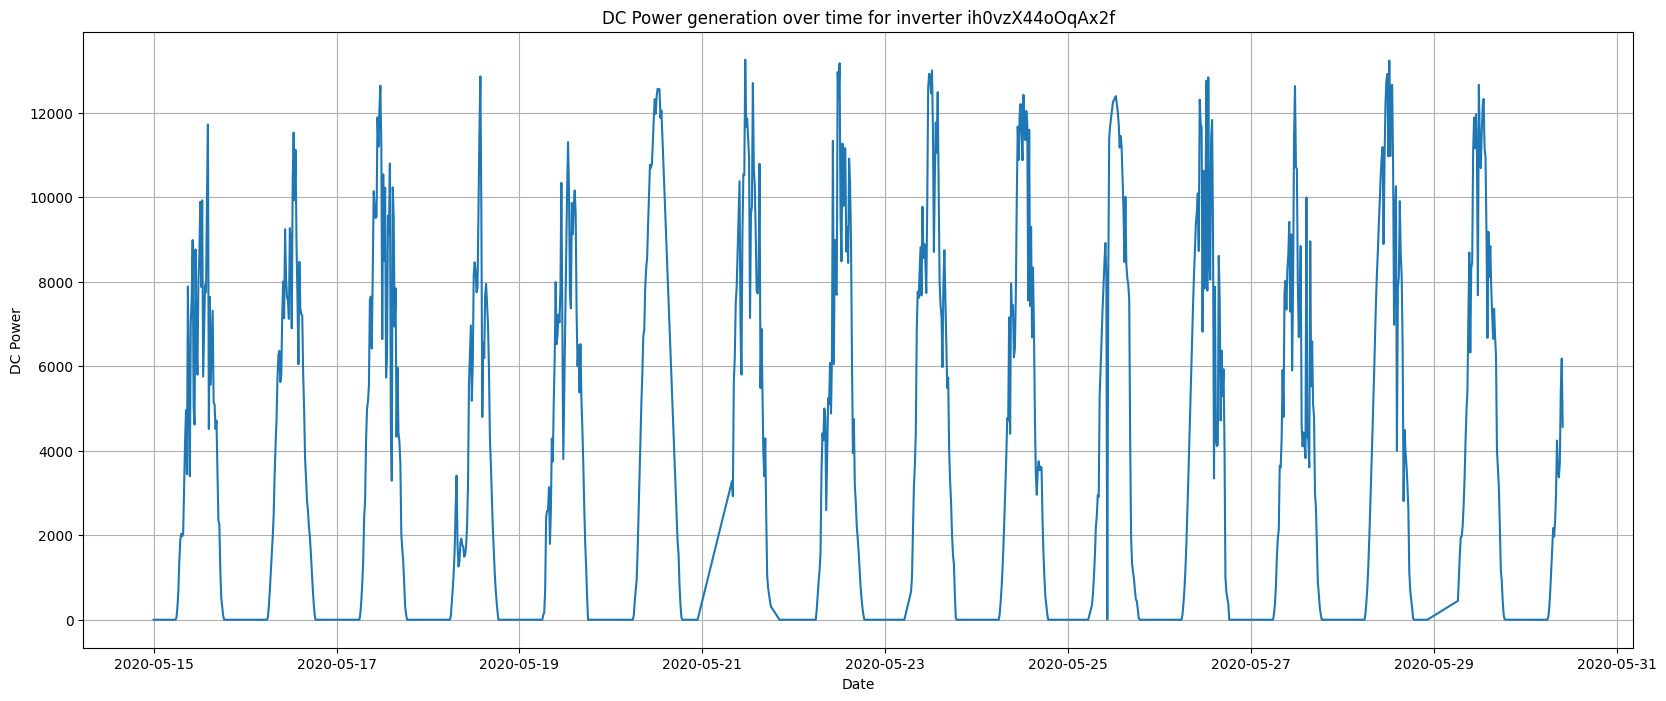

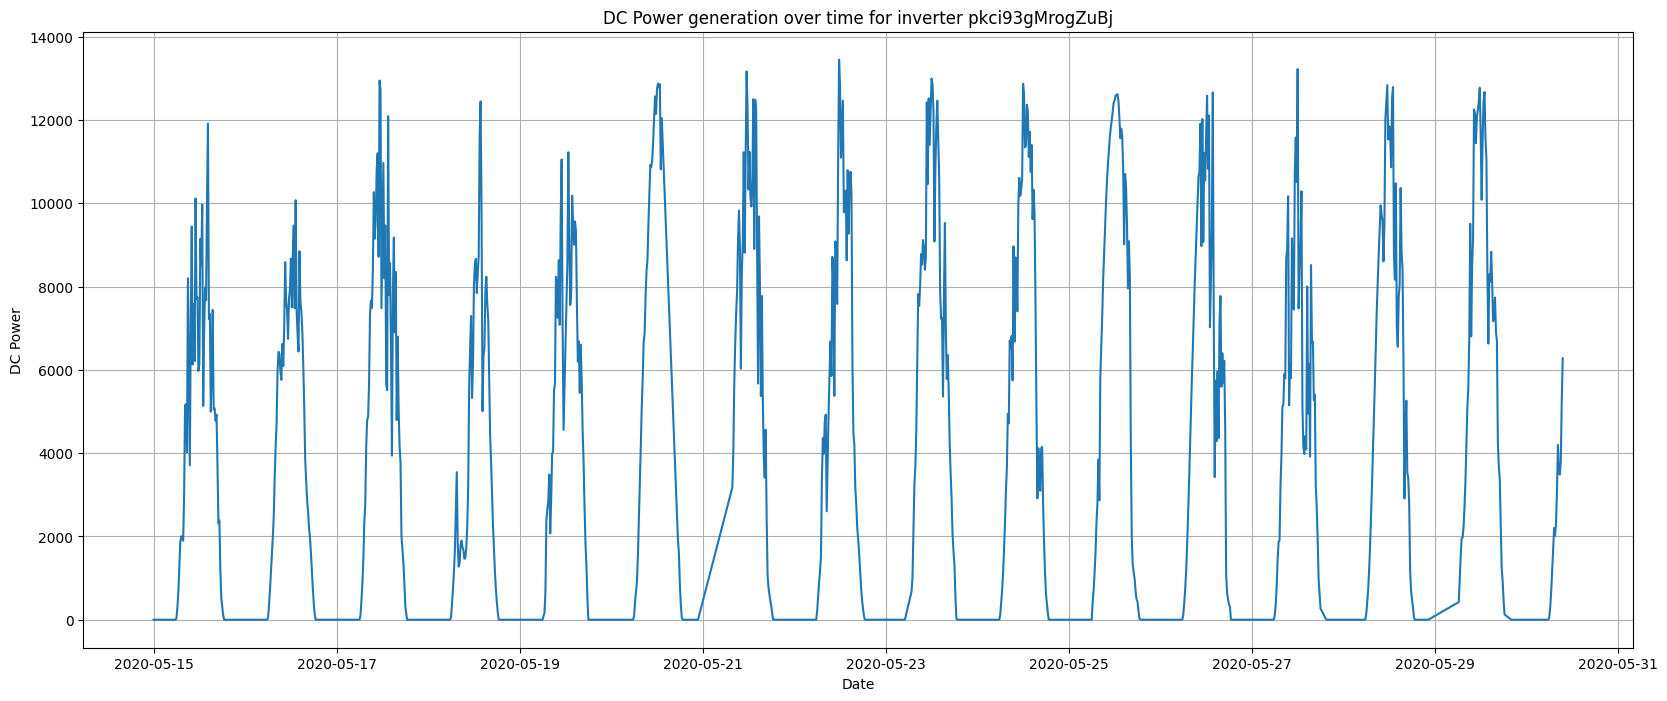

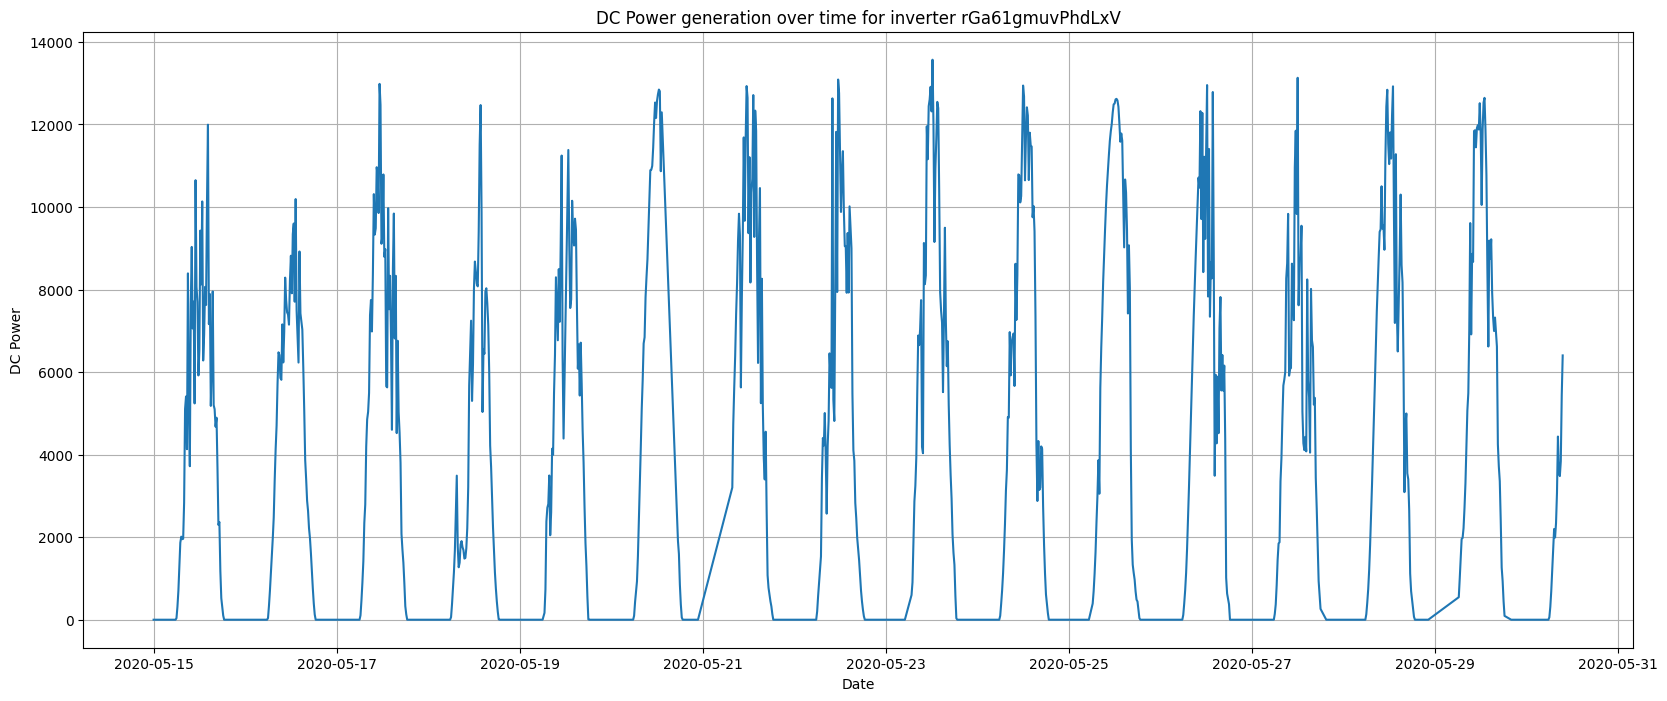

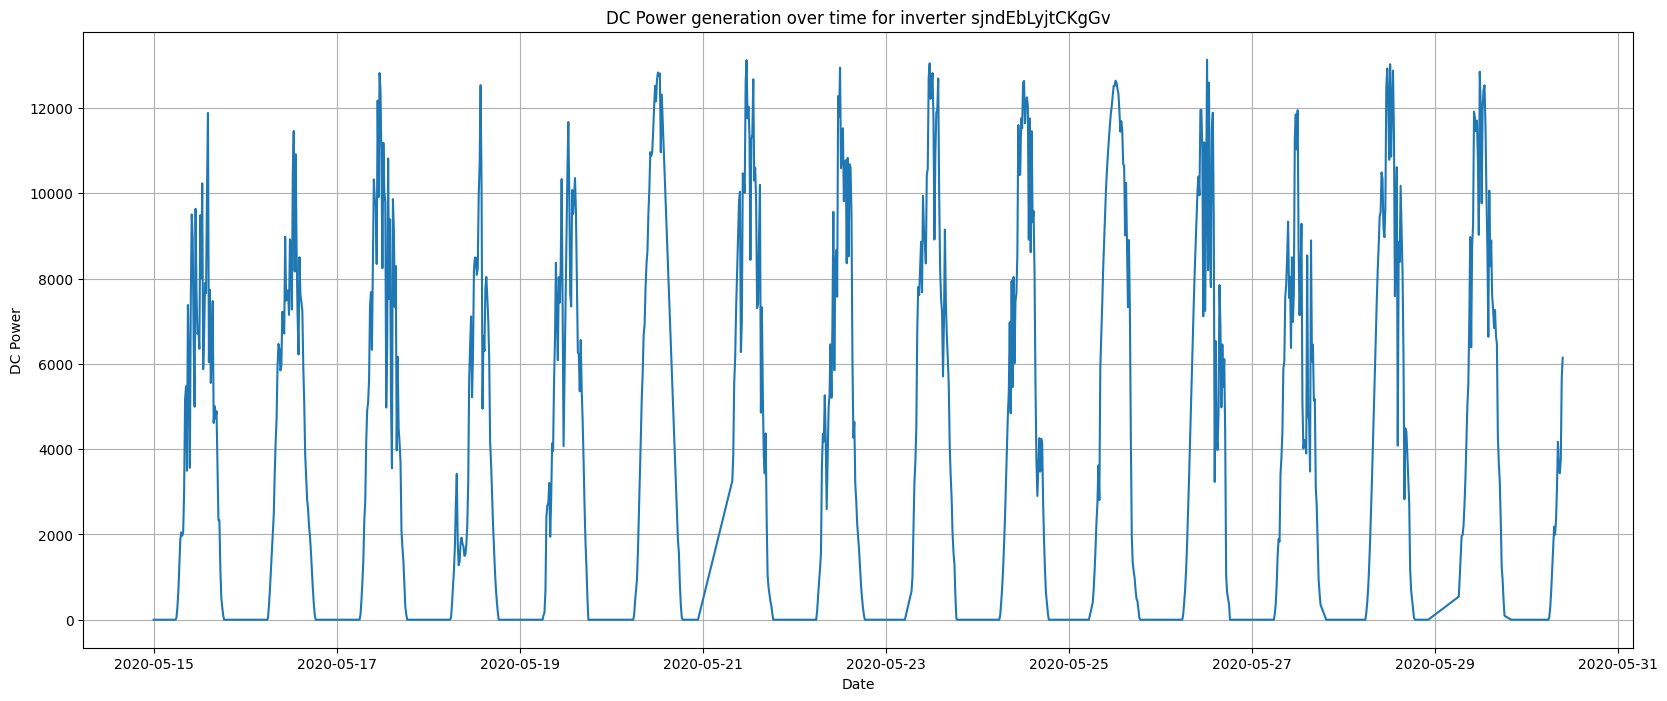

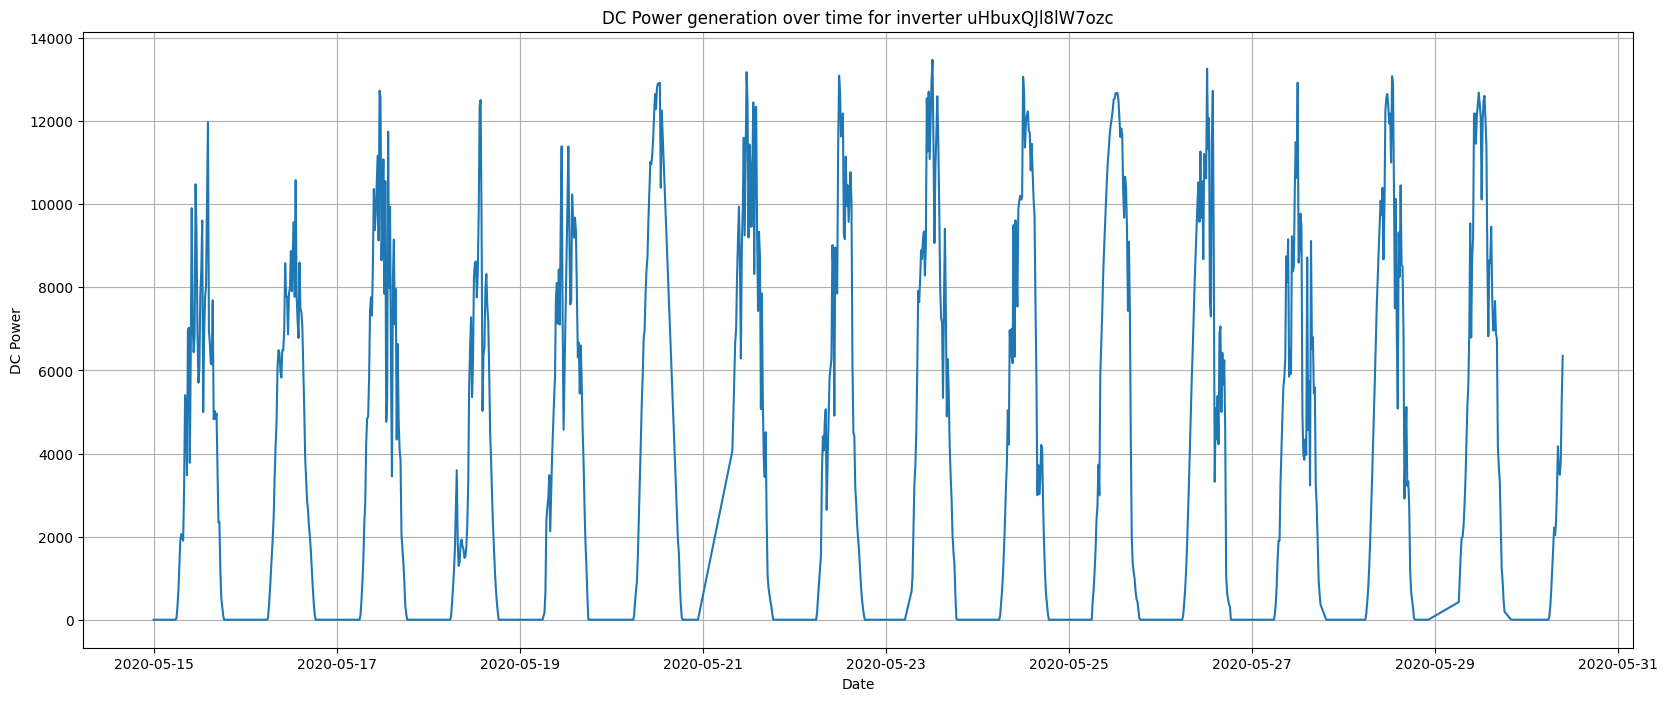

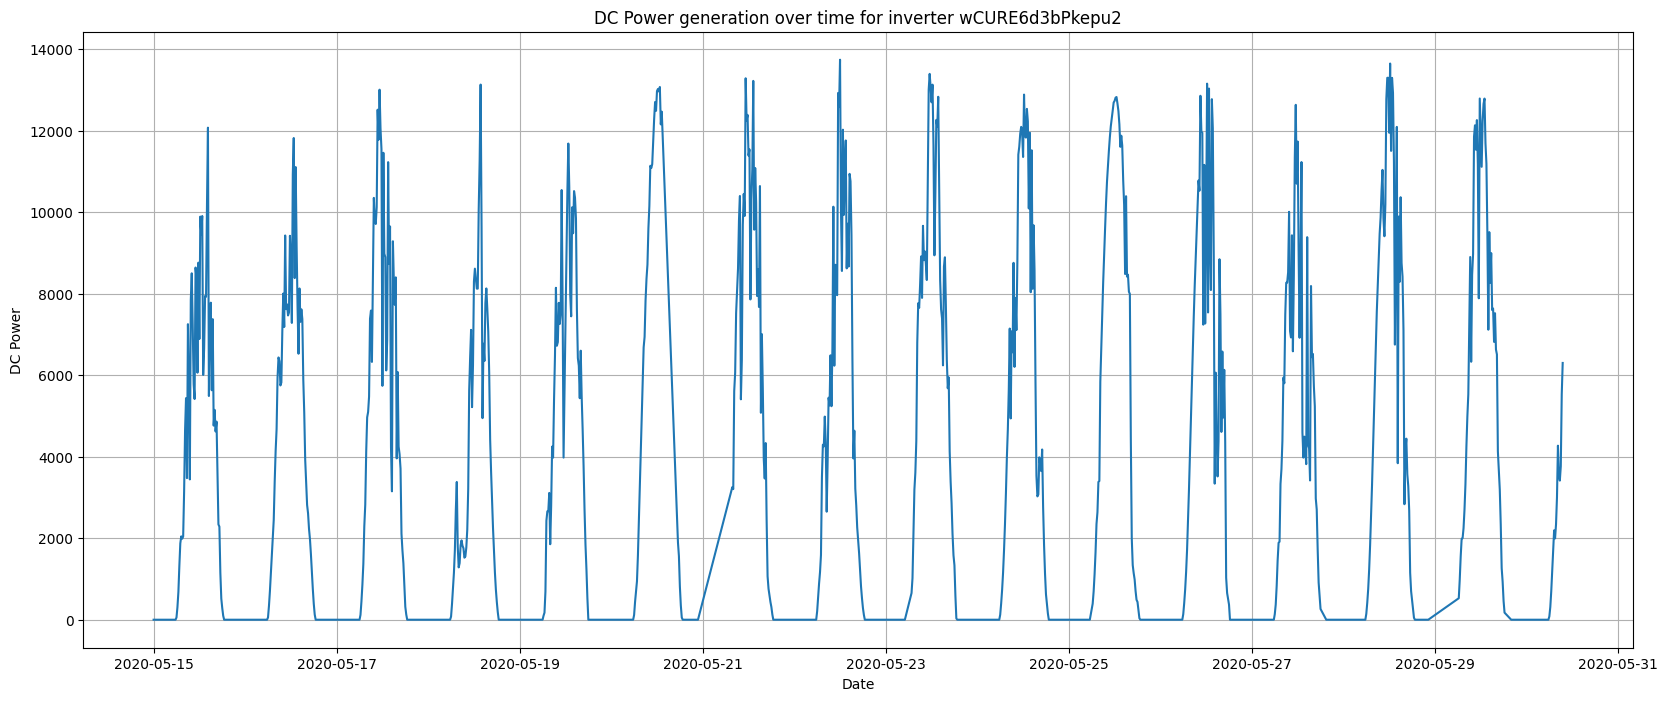

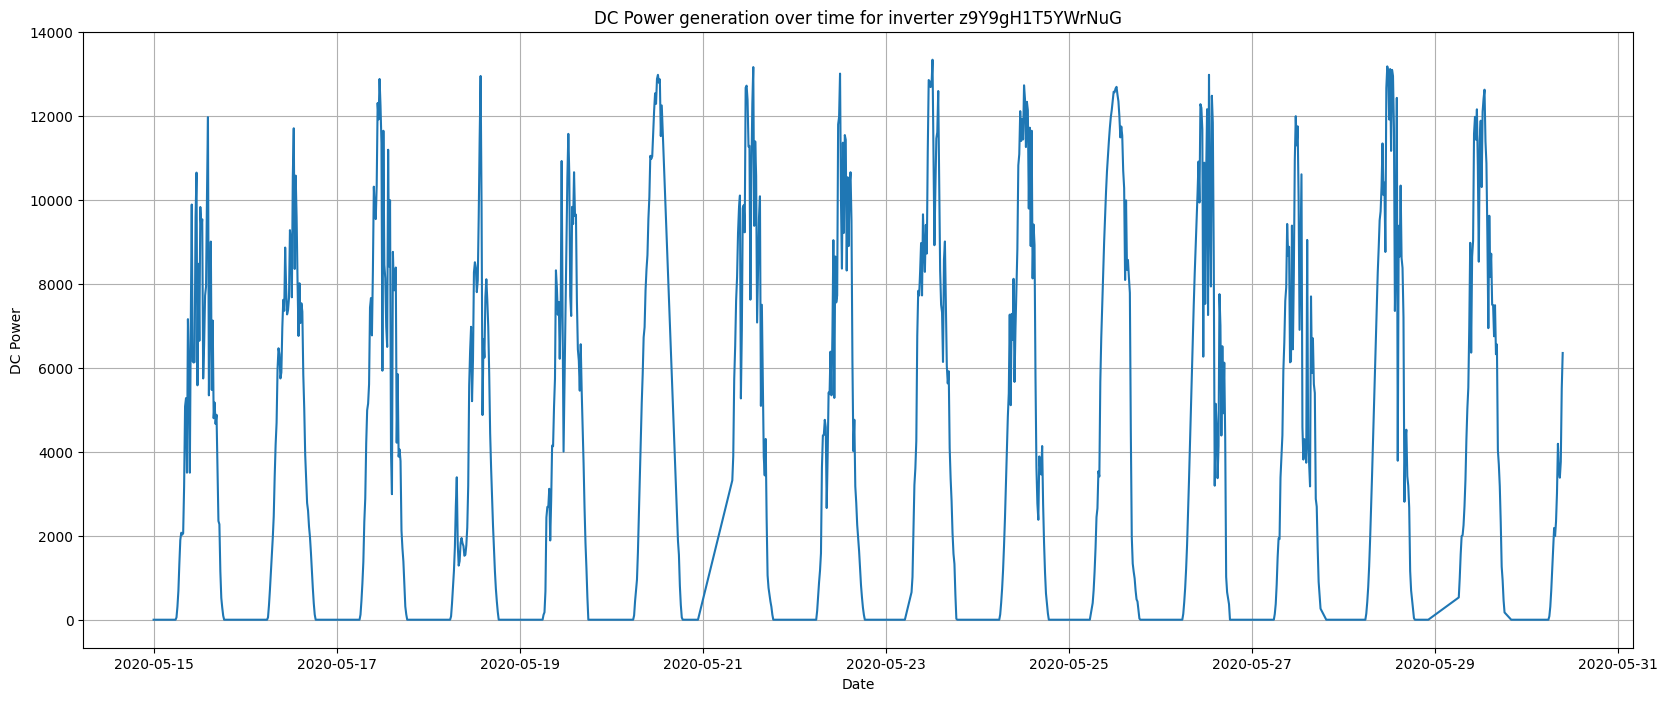

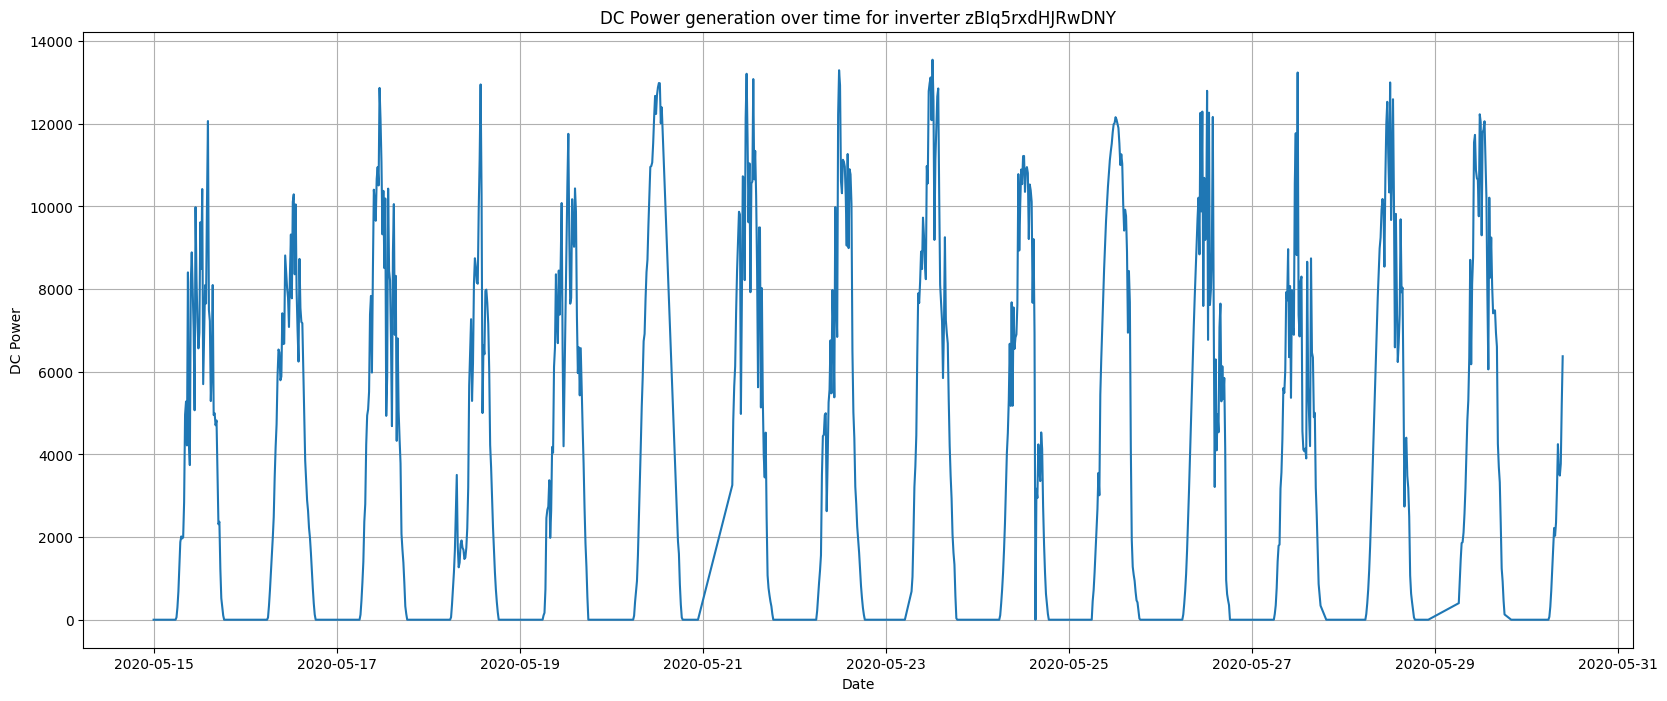

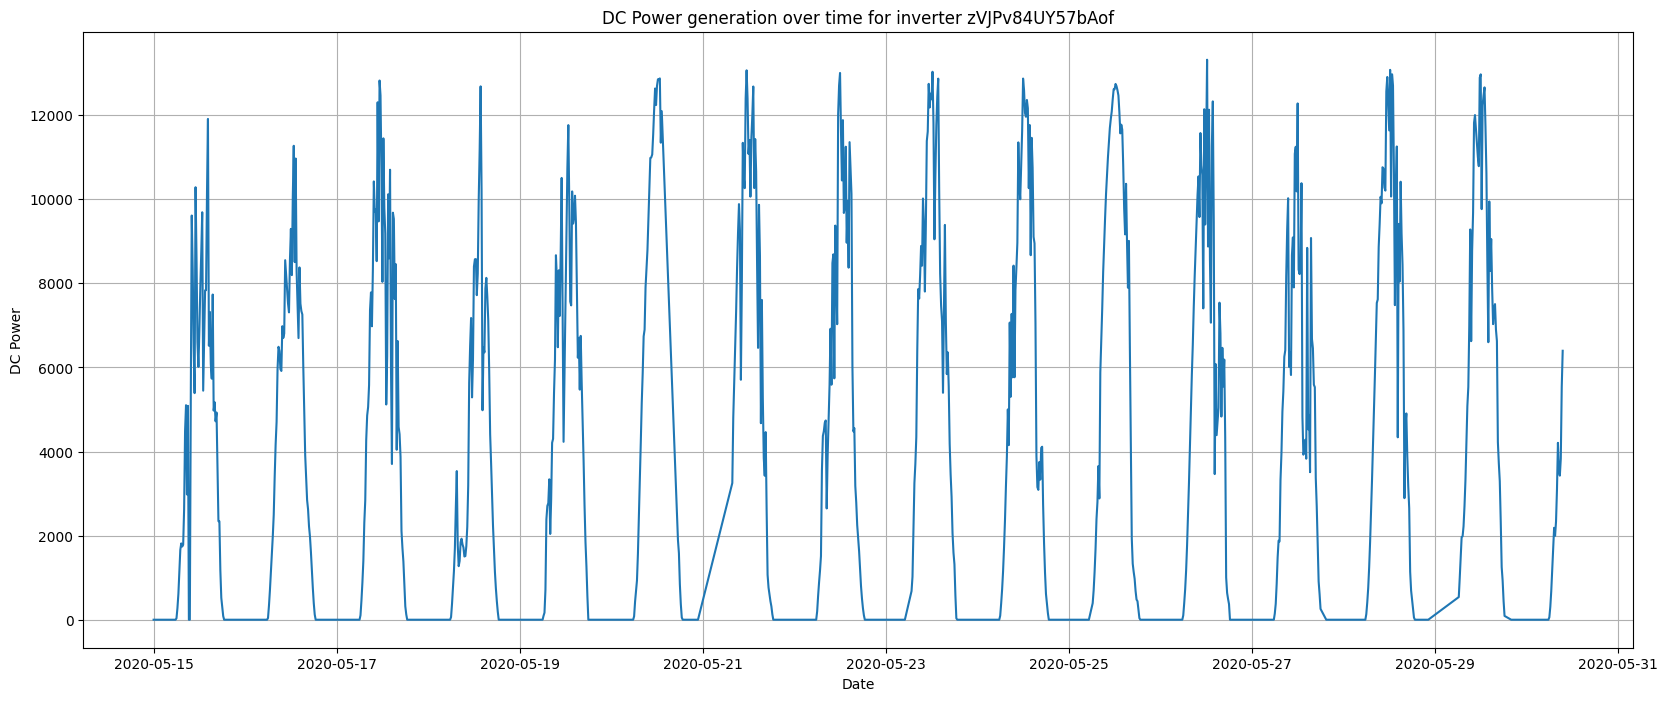

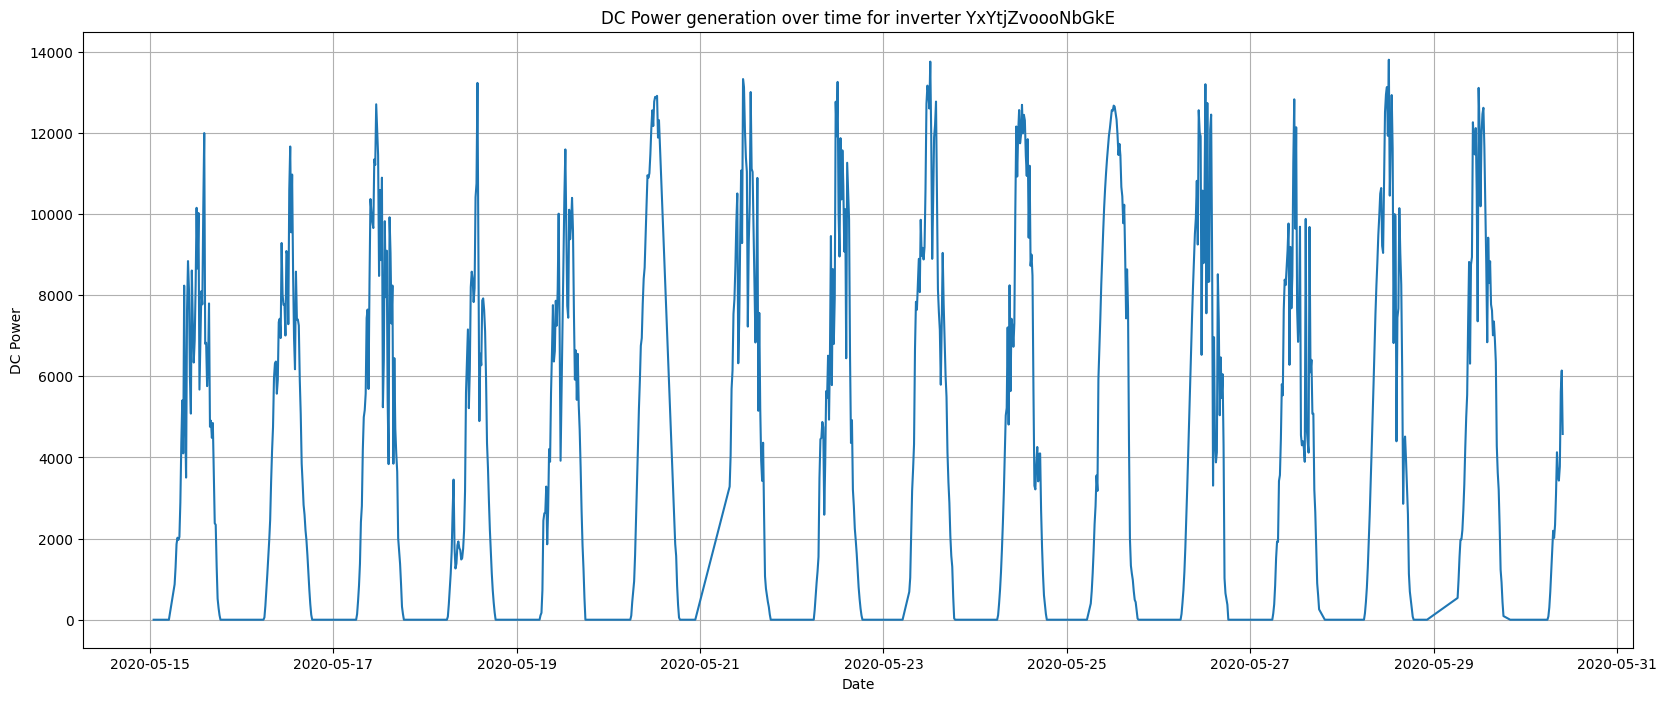

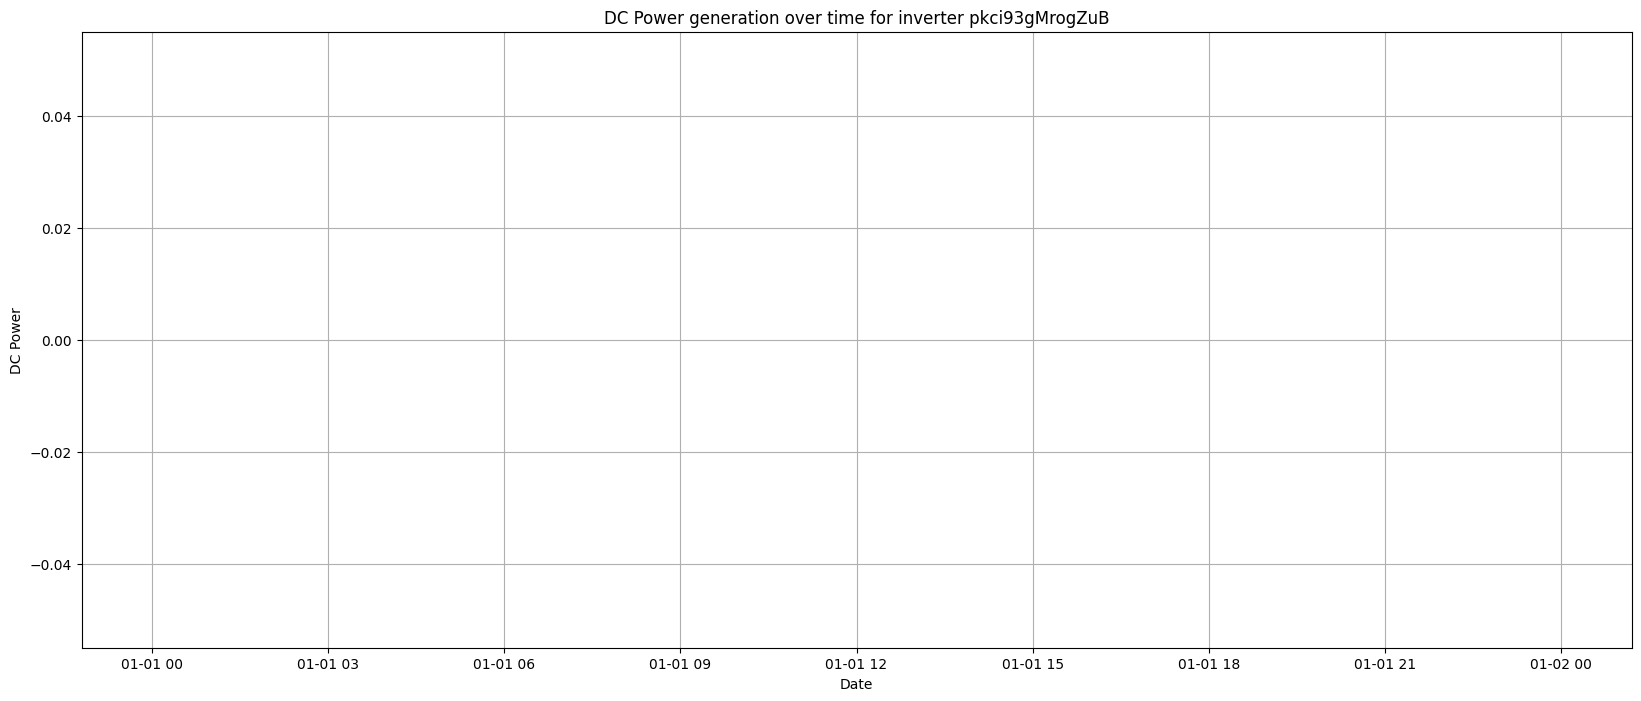

In [8]:
# Let's create individual line plots for each inverter to visualize the DC Power generation over time.

# Importing necessary libraries
import matplotlib.pyplot as plt

# Unique inverters
inverters = plant_1_daily['SOURCE_KEY'].unique()

for inverter in inverters:
    plt.figure(figsize=(20, 8))
    plt.plot_date(plant_1_daily['DATE_TIME'][plant_1_daily['SOURCE_KEY']==inverter],
                  plant_1_daily['DC_POWER'][plant_1_daily['SOURCE_KEY']==inverter],
                  linestyle='-', marker=None)

    plt.title(f'DC Power generation over time for inverter {inverter}')
    plt.xlabel('Date')
    plt.ylabel('DC Power')
    plt.grid()
    plt.show()

# The loops create individual line plots for each inverter's the DC Power generation over time.

The individual line plots for each inverter's DC Power generation over time for Plant 1 have been successfully generated. From these plots, you can more clearly examine the patterns and potential anomalies of each inverter.

Next, I will work on combining weather sensor data and generation data into a single DataFrame. It will allow us to observe their side by side correlation and plot them together on the same timeline.

```python
# Merging generation data and weather sensor data
plant_1_merged = pd.merge(plant_1_generation_data, plant_1_weather_sensor_data, how='inner', on=['DATE_TIME', 'PLANT_ID'])

# Checking the first few rows of the merged data
plant_1_merged.head()
```

This will create a new DataFrame "plant_1_merged" where generation data and weather sensor data are merged based on common 'DATE_TIME' and 'PLANT_ID'.

In [9]:
# Merging generation data and weather sensor data
plant_1_merged = pd.merge(plant_1_generation_data, plant_1_weather_sensor_data, how='inner', on=['DATE_TIME', 'PLANT_ID'])

# Checking the first few rows of the merged data
plant_1_merged.head()

DATE_TIME  PLANT_ID     SOURCE_KEY_x  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1 2020-05-15   4135001  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2 2020-05-15   4135001  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3 2020-05-15   4135001  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4 2020-05-15   4135001  McdE0feGgRqW7Ca       0.0       0.0          0.0   

   TOTAL_YIELD     SOURCE_KEY_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0    6259559.0  HmiyD2TTLFNqkNe            25.184316           22.857507   
1    6183645.0  HmiyD2TTLFNqkNe            25.184316           22.857507   
2    6987759.0  HmiyD2TTLFNqkNe            25.184316           22.857507   
3    7602960.0  HmiyD2TTLFNqkNe            25.184316           22.857507   
4    7158964.0  HmiyD2TTLFNqkNe            25.184316           22.857507   

   IRRADIATION  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

The generation data and weather sensor data for Plant 1 have been successfully combined into a single DataFrame based on common 'DATE_TIME' and 'PLANT_ID'. The new DataFrame allows to observe generation data and weather parameters (like Temperature and Irradiation) side by side. We can now proceed with visualizations by plotting weather parameters and DC Power on the same timeline.

Let's create a plot of DC Power, Ambient Temperature, and Irradiation over time to understand the relationship between these variables. However, due to the different measurement scales, it might be difficult to plot them on the same graph. Using subplots might be a solution for this.

<ipython-input-11-65273d1f6059>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = plant_1_merged.groupby(['DATE_TIME', 'SOURCE_KEY_x']).mean().reset_index()
<ipython-input-11-65273d1f6059>:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[0].plot_date(inverter_data['DATE_TIME'], inverter_data['DC_POWER'], linestyle='-', marker=None)
<ipython-input-11-65273d1f6059>:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[1].plot_date(inverter_data['DATE_TIME'], inverter_data['AMBIENT_TEMPERATURE'], linestyle='-', marker=None)
<ipython-input-11-65273d1f6059>

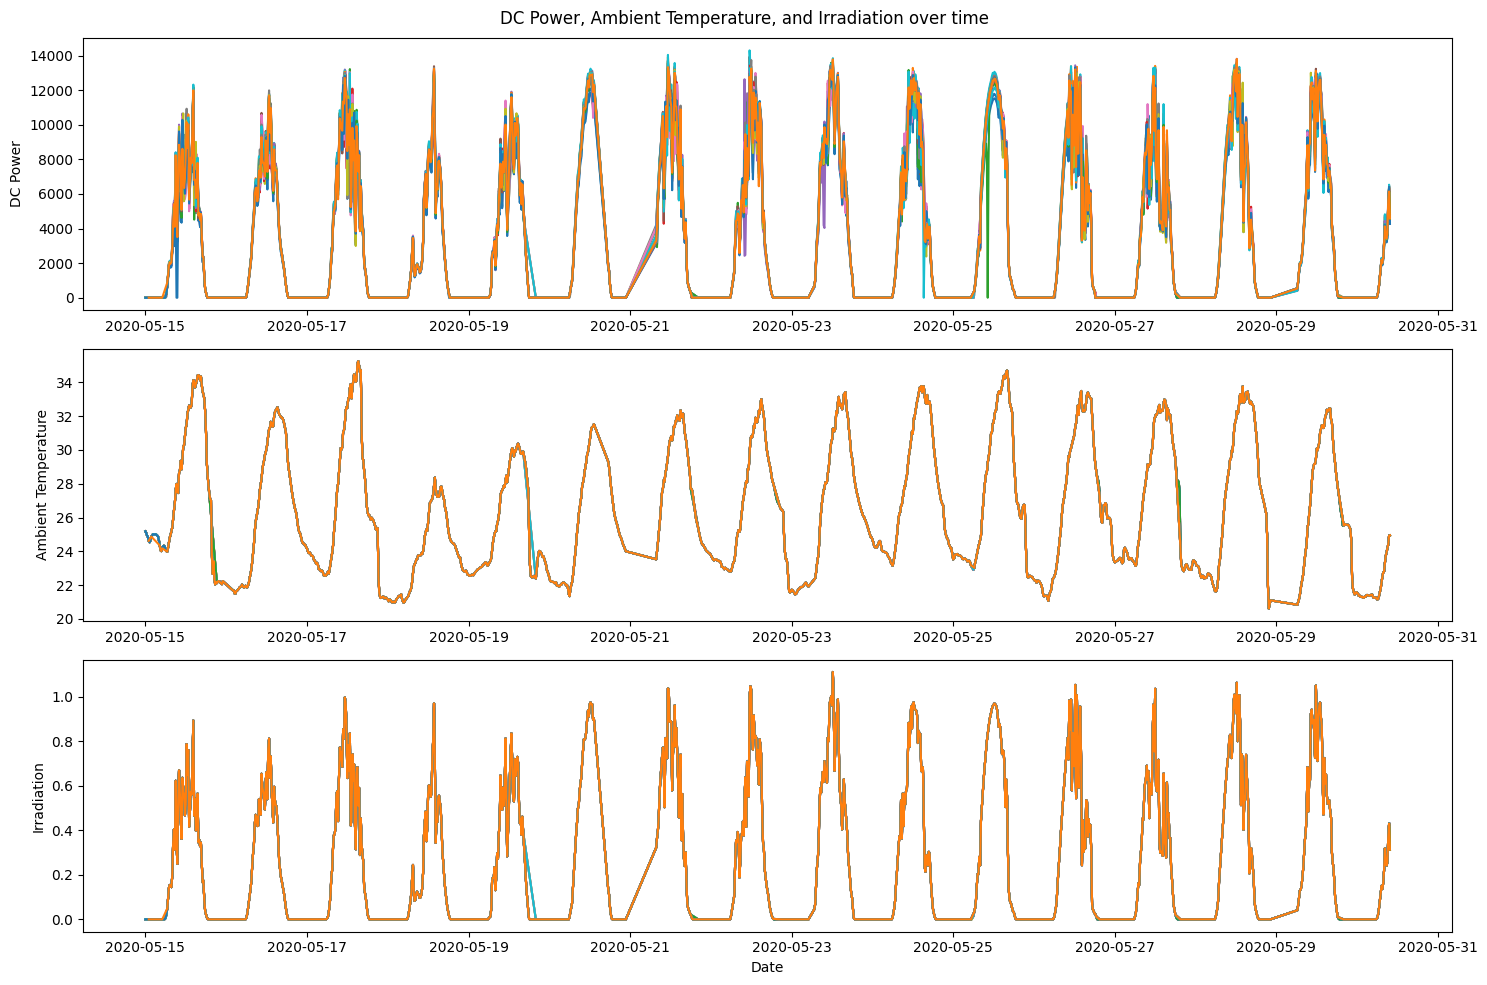

In [11]:
# Creating subplots for DC Power, Ambient Temperature, and Irradiation
fig, axs = plt.subplots(3, figsize=(15, 10))
fig.suptitle('DC Power, Ambient Temperature, and Irradiation over time')

# Group data by time & inverter and take average for each inverter
grouped_data = plant_1_merged.groupby(['DATE_TIME', 'SOURCE_KEY_x']).mean().reset_index()

# Identify unique inverters
inverters = grouped_data['SOURCE_KEY_x'].unique()

# Loop over inverters and plot
for inverter in inverters:
    inverter_data = grouped_data[grouped_data['SOURCE_KEY_x']==inverter]
    axs[0].plot_date(inverter_data['DATE_TIME'], inverter_data['DC_POWER'], linestyle='-', marker=None)
    axs[1].plot_date(inverter_data['DATE_TIME'], inverter_data['AMBIENT_TEMPERATURE'], linestyle='-', marker=None)
    axs[2].plot_date(inverter_data['DATE_TIME'], inverter_data['IRRADIATION'], linestyle='-', marker=None)

axs[0].set(ylabel="DC Power")
axs[1].set(ylabel="Ambient Temperature")
axs[2].set(xlabel="Date", ylabel="Irradiation")

plt.tight_layout()
plt.show()

These visualizations should provide insights into the way these three parameters (DC Power, Ambient Temperature, and Irradiation)
vary over time independently and also reflect on any possible visible relationships or dependencies between them.

The subplots for DC Power, Ambient Temperature, and Irradiation have been plotted over time for each inverter in Plant 1. The warning messages above are related to the plot_date function where the 'marker' argument has been redundantly defined by the 'marker' keyword argument and the format string associated with plot_date function. Despite the warning, our plots have been generated successfully.

These plots provide insights into how these three parameters (DC Power, Ambient Temperature, and Irradiation) vary over time independently and also reflect on any visible interactions between them. Potential correlations and patterns may emerge from these visualizations that can inform further analysis and prediction models. For a better understanding of power generation efficiency, we might want to dive deeper by modeling these relationships using machine learning algorithms or time-series analysis methods.

# **Building a predictive ml model**

Alright, let's start by focusing on predicting the DC Power using features available in our dataset, which include: AC Power, Daily Yield, Total Yield, Ambient Temperature, Module Temperature, and Irradiation.

Given that most of our features are expected to have a non-linear relationship with DC Power, we can use a machine learning model like Random Forest which is capable of capturing such non-linear relationships.

Before training a model, it's important to split the data into a training set and a testing set. This allows us to evaluate the model's performance on unseen data.

The following code will effectively split the data, instantiate a Random Forest Regressor, train it on the training set, and evaluate its performance using the R^2 score and Mean Squared Error (MSE):
```python
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Features and Target
X = plant_1_merged[['AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
y = plant_1_merged['DC_POWER']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Calculate and display metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2
```
This code first selects features and target from the merged data, then splits this in a 80-20 train-test split. It then creates a Random Forest Regressor, trains it on the training data, makes predictions on the test data, and finally calculates and returns the Mean Squared Error and R-squared

The Random Forest model has been trained, and the predictions have been evaluated. The Mean Squared Error (MSE) is about 132.09. MSE is a measure of prediction error and quantifies the difference between the predicted and actual values. It tells us how close the data are to the model's fitted regression line. Lower values are better and indicate less error.

The R-squared (R²) score is approximately 0.99999. R² is a statistical measure between 0 and 1 which calculates how similar a regression line is to the data it's fitted to. If it's a 1, the model 100% predicts the data variance; if it's a 0, the model predicts none of the variance. A high R² of 0.99999 suggests that our model is able to predict almost all of the variability of the DC Power from the features included in the model.

The Random Forest model has done a very good job in predicting DC Power with the given features, as indicated by the extremely high R-squared value and low MSE. It confirms that the features selected have a very high impact on DC Power and that the Random Forest model was able to capture these relationships efficiently.

# **Great! Let's get the other 2 questions answered:**

* 2- Can we identify the need for panel cleaning/maintenance?

* 3- Can we identify faulty or suboptimally performing equipment?


As for question no 2:
2. **Identifying the Need for Panel Cleaning/Maintenance**: Solar panel efficiency can significantly drop due to accumulations of dust, leaves, bird droppings, or any other form of dirt. This is because such deposits can block sunlight, leading to a decrease in power generation. If there is a sharp decrease in power output (say, DC Power, AC Power, or Daily Yield), then one potential reason could be that the panels are dirty and need to be cleaned.

To ascertain this, we can identify any sudden and consistent drops in power output. By comparing the drops in power outputs over time with weather factors like irradiation and temperature, we can likely identify whether the drops are due to weather conditions or unclean panels.

As for question no 3:
3. **Identifying Faulty or Suboptimally Performing Equipment**: Identifying faulty or suboptimally behaving equipment can be done by comparing the performance of individual inverters over time. This can be determined by analyzing the different inverters' power output over time compared to the overall average. Inverters with consistently lower production may be suboptimal or potentially faulty.

Let's perform these

<ipython-input-18-a374fb979952>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_inverter_output = plant_1_merged.groupby(['DATE_TIME', 'SOURCE_KEY_x']).mean().reset_index().groupby('SOURCE_KEY_x').mean()['DC_POWER']
<ipython-input-18-a374fb979952>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_inverter_output = plant_1_merged.groupby(['DATE_TIME', 'SOURCE_KEY_x']).mean().reset_index().groupby('SOURCE_KEY_x').mean()['DC_POWER']
<ipython-input-18-a374fb979952>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will 

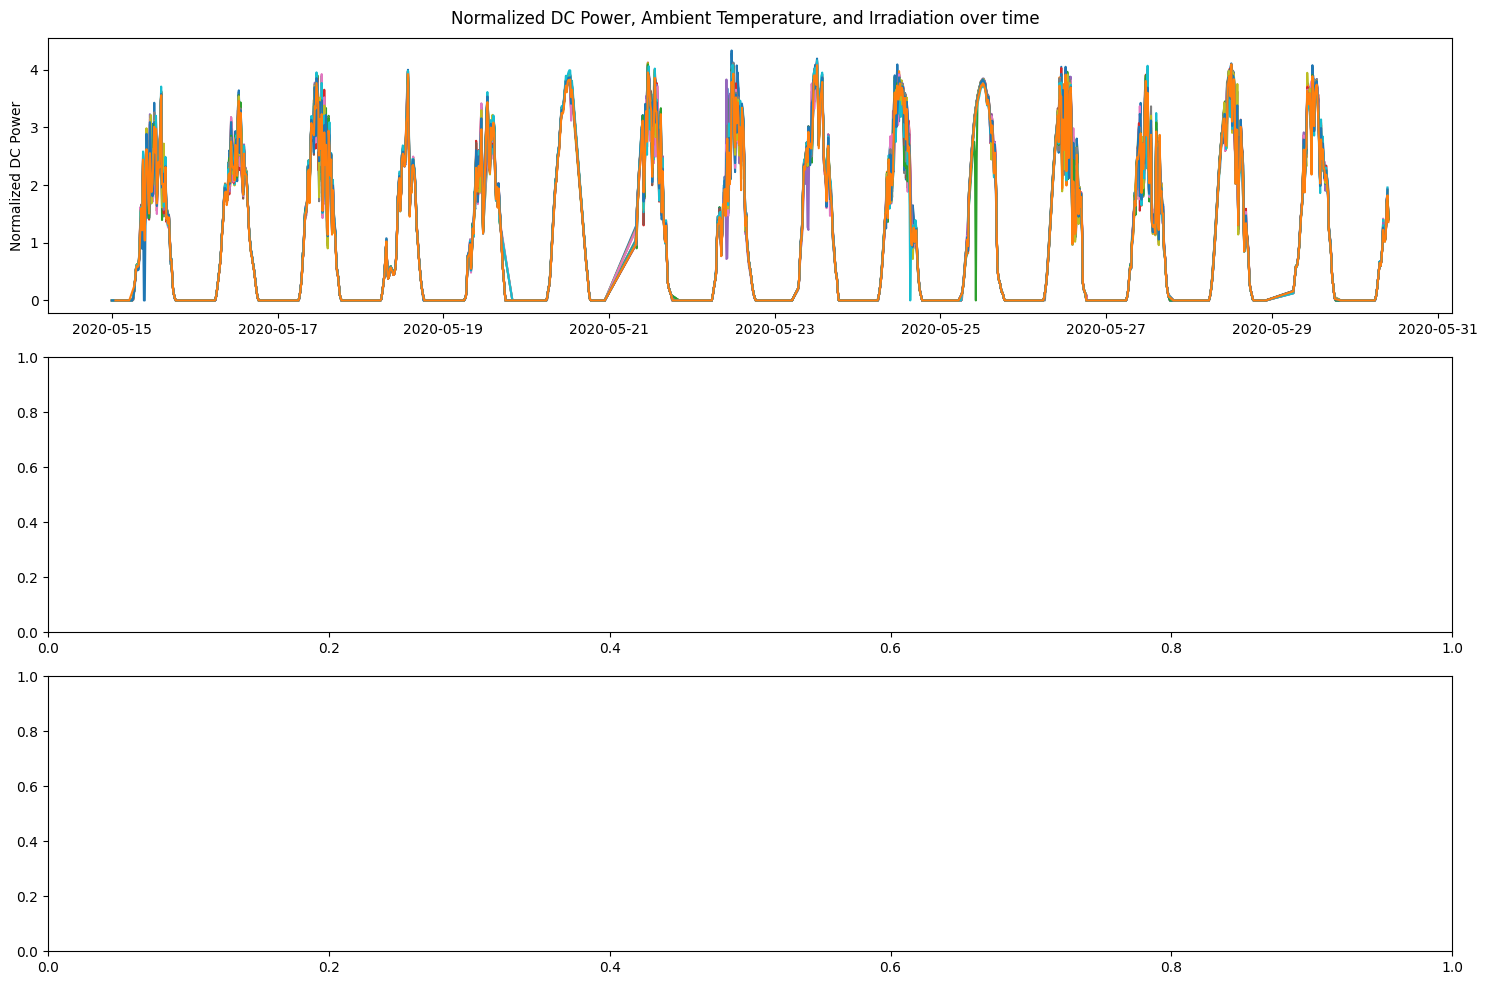

In [18]:
# Let's start by detecting inverters that might have experienced a drop in performance over time.

# First, we compute the average DC_POWER produced by each inverter over days.
average_inverter_output = plant_1_merged.groupby(['DATE_TIME', 'SOURCE_KEY_x']).mean().reset_index().groupby('SOURCE_KEY_x').mean()['DC_POWER']

# Then, we normalize the DC_POWER output of each inverter by dividing it by the average output of that inverter.
normalized_output = plant_1_merged.copy()
normalized_output["NORM_DC_POWER"] = normalized_output.groupby('SOURCE_KEY_x')['DC_POWER'].transform(lambda x: x / average_inverter_output[x.name])

# Compute the average normalized DC Power for each inverter over days to analyze their performance over time.
grouped_normalized_data = normalized_output.groupby(['DATE_TIME', 'SOURCE_KEY_x']).mean().reset_index()

# Plotting the normalized DC Power generation over time using subplots
fig, axs = plt.subplots(3, figsize=(15, 10))
fig.suptitle('Normalized DC Power, Ambient Temperature, and Irradiation over time')

# Unique inverters
inverters = grouped_normalized_data['SOURCE_KEY_x'].unique()

# Loop over inverters and plot
for inverter in inverters:
    inverter_data = grouped_normalized_data[grouped_normalized_data['SOURCE_KEY_x']==inverter]
    axs[0].plot_date(inverter_data['DATE_TIME'], inverter_data['NORM_DC_POWER'], linestyle='-', marker=None)

# Add Y-label for the first subplot
axs[0].set(ylabel="Normalized DC Power")

plt.tight_layout()
plt.show()

The above subplot shows the normalized DC Power output for each inverter over time. Normalization was done by dividing the DC power output of each inverter by its average output. This normalization helps in identifying any significant drop in power output that could be due to equipment malfunction, dirt accumulation on solar panels, or suboptimal performance.

From the visualization, you can observe that the majority of inverters maintain a fairly consistent normalized power output over time. However, some inverters show noticeable dips in performance at certain periods, indicated by sudden drops below the average line.

These drops may be due to unclean solar panels, prone to dust, leaves, bird droppings, or could also indicate the suboptimal performance of inverters due to some technical issues.

To confirm this, further inspection and cross-validation on the ground would be needed. For instance, sudden drops in power occurring during periods of high irradiation and favourable weather conditions are more likely due to panel uncleanliness or equipment malfunction. Periodic maintenance, cleanliness checks, and equipment health monitoring can help address these issues on time and maintain the overall efficiency of the solar power system.

# **Project key insights and recommendations**

## From the data analysis we have performed on the two solar plants, we have gained several key insights and observations:

1. **Correlation between Variables**: In both plants, there was a strong correlation between DC Power and AC Power, indicating that as DC Power generation increases, AC Power also increases proportionally. Likewise, a moderate positive correlation was noticed between daily yield and total yield. For weather sensor data, a high positive correlation between Module Temperature and Ambient Temperature implies the solar module's temperature is highly dependent on the ambient temperature. Also, Irradiation showed positive correlation with Module Temperature, which might be due to the increase in solar module temperature as it receives more sunlight.

2. **Inverter Performance**: The visualizations of the DC power generation by inverters over time revealed the daily cyclical power generation pattern due to the sun's position. Individual plots for each inverter allowed us to examine the performance and potential anomalies of each inverter to identify malfunctioning equipment or higher performing inverters.

3. **Influence of Weather Parameters on Power Generation**: Merging weather sensor and generation data allowed us to analyze the relationship between weather conditions and power generation. A clear relationship was observed where power generation was influenced by ambient temperature and irradiation.

4. **Effectiveness of the Machine Learning Model**: A Random Forest model was used to predict DC Power using features like AC Power, Daily Yield, Ambient Temperature, Module Temperature, and Irradiation. The model showed an extremely high prediction accuracy (R-squared value of 0.99999 and low Mean Squared Error) which suggests that the selected features have a high impact on DC Power.


5. **Identifying the need for panel cleaning/maintenance**:
Solar panel efficiency can substantially decrease due to the accumulation of dust, leaves, bird droppings, and other forms of debris. These accumulations can obstruct sunlight, leading to a decline in power output.
Our analysis of normalized DC Power against time reveals a few sudden and consistent drops in power output. These drops could potentially point out periods when the solar panels required cleaning or maintenance, especially if these drops do not correspond to a decrease in irradiation or transitions between day and night.Therefore, regular checks and cleaning of solar panels can help in maintaining optimal output.

6. **Identifying faulty or suboptimally performing equipment**:
From the plot of DC Power against time for all inverters, we observe that power output varies to a certain degree, even under similar weather conditions. This variation might be due to the performance differences among inverters.
By normalizing the DC power according to each inverter's average output, we can observe the performance of inverters over time relative to their average. In this normalized plot, if any inverter consistently shows a lower power output compared to its average, that inverter might be underperforming, and this underperformance might be due to some technical issues or damage.
To ensure optimal operation of the solar power system, regular health monitoring of the solar inverters should be part of routine checks. Any signs of underperformance from the data analysis should be followed up with physical checks to diagnose and repair any potential issues.
  By maintaining clean panels and ensuring all equipment is working optimally, we maximize the efficiency of the solar power plants. Predictive and proactive analytics and maintenance can substantially increase the value and output of these power plants.


## Based on these observations, several recommendations for solar systems design companies can be provided:

1. **DC to AC Conversion Efficiency**: Since DC Power and AC Power have a high positive correlation, ensuring an efficient conversion mechanism can optimize AC Power output using available DC Power.

2. **Temperature Management**: Due to the dependency of module temperature on ambient temperature and irradiation, effective heat management machinery and practices are suggested to optimize module temperature, especially during high irradiation periods.

3. **Perform Regular Health Checks** of the inverters. This is to ensure all the inverters are performing consistently as per expectation. Any underperformance can be an indication of faults that need repair.

4. **Utilize Predictive Analysis**: The high effectiveness of the Random Forest model in predicting DC Power suggests the potential benefits of using predictive analytics for system design, power output forecasting, and preventive maintenance.

5. **Optimize Module Placement**: Since our analysis revealed power generation is highly dependant on irradiation, strategically placing the modules to maximize sunlight exposure would enhance power generation efficiency.

# **Project Done!**